# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [251]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [372]:
# Loading the dataset

df=pd.read_csv("HRAnalytics.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# Exploratory Data Analysis

In [253]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

There are 5 rows and 35 columns

In [254]:
# Checking the bottom 7 rows
df.tail(7)

Age Attrition     BusinessTravel  DailyRate              Department  \
1463   31        No         Non-Travel        325  Research & Development   
1464   26        No      Travel_Rarely       1167                   Sales   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1463                 5          3        Medical              1   
1464                 5          3          Other              1   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1463            2057  ...                         2            80   
1464            2060  ...                         4            80   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1463                 0                 10                      2   
1464                 0                  5                      2   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1463               3               9                  4   
1464               3               4                  2   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1463                        1                     7  
1464                        0                     0  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[7 rows x 35 columns]

In [255]:
# Checking the random 5 rows
df.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
1343   29        No      Travel_Rarely        592  Research & Development   
695    37       Yes      Travel_Rarely        625                   Sales   
55     33        No  Travel_Frequently        515  Research & Development   
890    54        No  Travel_Frequently        966  Research & Development   
92     30        No      Travel_Rarely       1334                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1343                 7          3  Life Sciences              1   
695                  1          4  Life Sciences              1   
55                   1          2  Life Sciences              1   
890                  1          4  Life Sciences              1   
92                   4          2        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1343            1883  ...                         2            80   
695              970  ...                         3            80   
55                73  ...                         3            80   
890             1245  ...                         1            80   
92               121  ...                         2            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1343                 0                 11                      2   
695                  0                 17                      2   
55                   0                 15                      1   
890                  1                 33                      2   
92                   3                 11                      4   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1343               3               3                  2   
695                1              14                  1   
55                 3              15                 14   
890                1               5                  4   
92                 2              11                  8   

      YearsSinceLastPromotion  YearsWithCurrManager  
1343                        1                     2  
695                        11                     7  
55                          8                    12  
890                         1                     4  
92                          2                     7  

[5 rows x 35 columns]

In [256]:
# Checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [257]:
# Checking the unique value
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [258]:
#Checking the data type of each features
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are both categorical and Numberical data present in the dataset.

In [259]:
# Checking the shape

df.shape

(1470, 35)

1470 rows and 35 columns

In [260]:
# Checking the columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [261]:
# Lets drop the unnecessary column

df=df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1)
df.head(2)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  

[2 rows x 31 columns]

4 columns have dropped out from data

In [262]:
# Checking the count in Attrition field
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [263]:
# Checking the Gender count
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [264]:
# Checking the Department count to see how many people belongs to each department
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [265]:
# Checking the count in Education Field
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [266]:
# Checking the Null value

df.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                False      False           False                    False   
1                False      False           False                    False   
2                False      False           False                    False   
3                False      False           False                    False   
4                False      False           False                    False   
...                ...        ...             ...                      ...   
1465             False      False           False                    False   
1466             False      False           False                    False   
1467             False      False           False                    False   
1468             False      False           False                    False   
1469             False      False           False                    False   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0      False  ...              False                     False   
1      False  ...              False                     False   
2      False  ...              False                     False   
3      False  ...              False                     False   
4      False  ...              False                     False   
...      ...  ...                ...                       ...   
1465   False  ...              False                     False   
1466   False  ...              False                     False   
1467   False  ...              False                     False   
1468   False  ...              False                     False   
1469   False  ...              False                     False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469     

In [267]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There is no value present in the data. Good to proceed

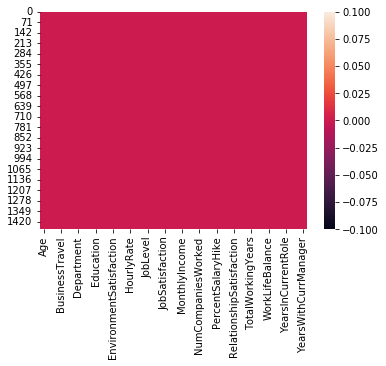

In [268]:
sns.heatmap(df.isnull())

In [269]:
#Checking the unique value in Attrition
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [270]:
# Checking the Description
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

In [271]:
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBalance             1470
YearsAtCompany              1470
YearsInCurrentRole          1470
YearsSinceLastPromotion     1470
YearsWithC

# Correlation

In [272]:
dfcorr=df.corr()
dfcorr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

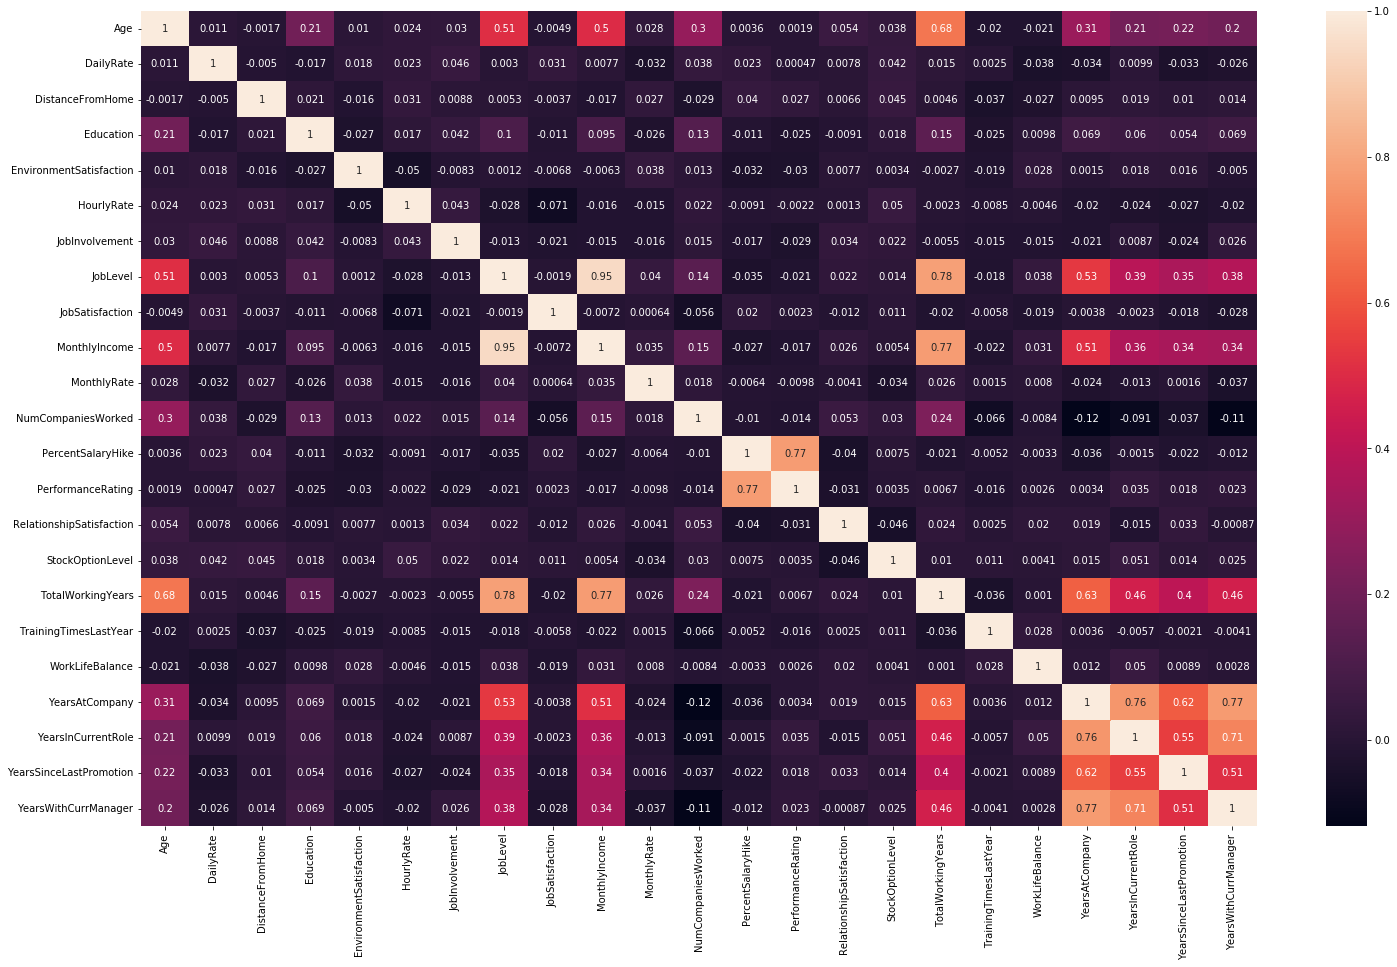

In [273]:
plt.figure(figsize=(25,15))
sns.heatmap(dfcorr,annot=True)

We have converted the Attrition to Numerical data

# Data Visualization

No     1233
Yes     237
Name: Attrition, dtype: int64


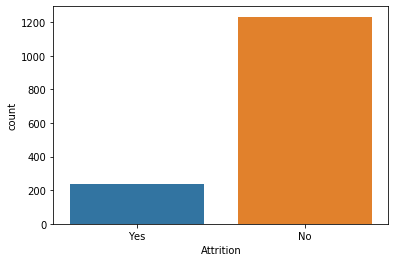

In [274]:
# Viewing the Attrition count using countplot
print(df['Attrition'].value_counts())
sns.countplot(df['Attrition'])

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


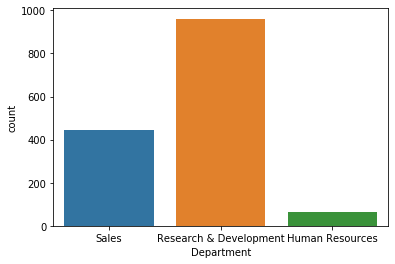

In [275]:
#Viewing the count of each Department using countplot
print(df['Department'].value_counts())
sns.countplot(df['Department'])

Research and development department count is high as compare to other departments

Male      882
Female    588
Name: Gender, dtype: int64


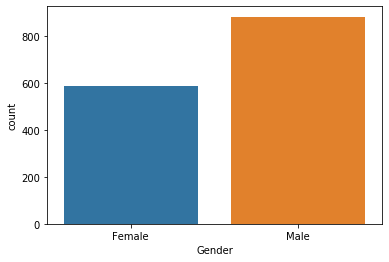

In [276]:
# Viewing the Gender using countplot
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

Male count is higher than female count

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


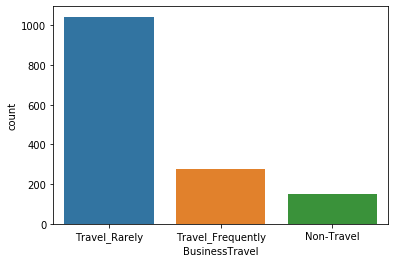

In [277]:
# Viewing the BusinessTravel using countplot
print(df['BusinessTravel'].value_counts())
sns.countplot(df['BusinessTravel'])

People who travel rarely count is high as compare to Frequent traveller and Non-Travel person

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


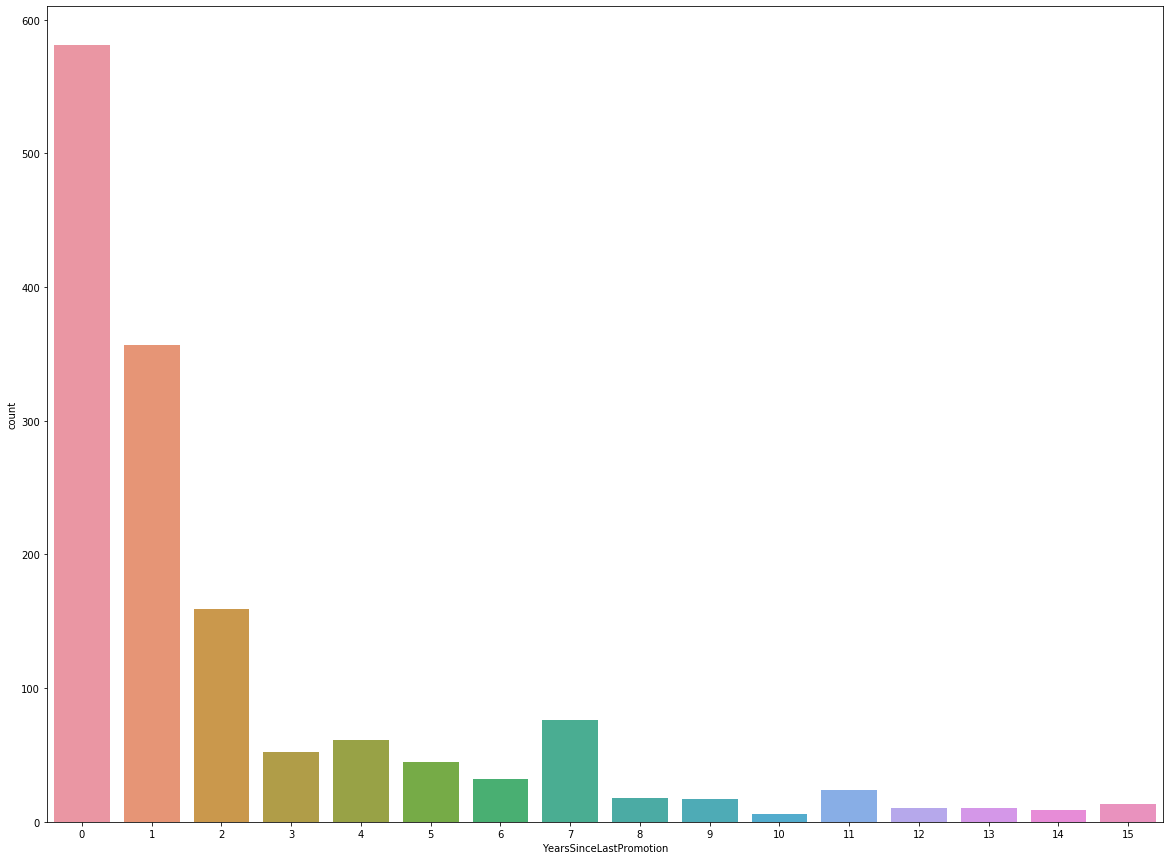

In [278]:
# Viewing the YearsSinceLastPromotion using countplot
plt.figure(figsize=(20,15))
print(df['YearsSinceLastPromotion'].value_counts())
sns.countplot(df['YearsSinceLastPromotion'])

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


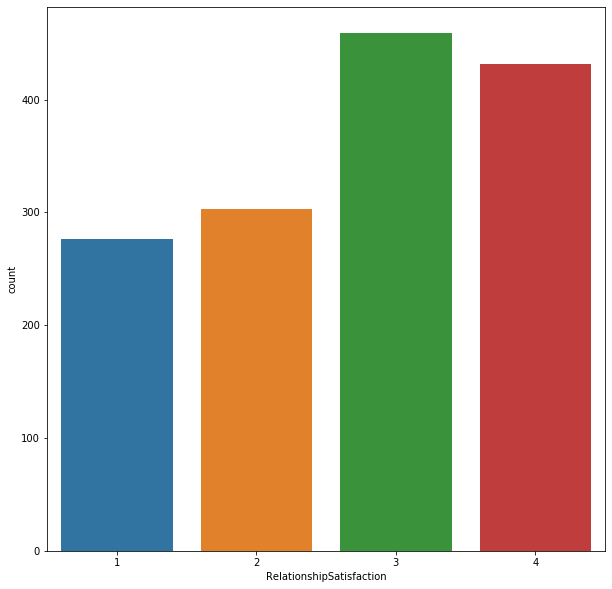

In [279]:
#Viewing the RelationshipSatisfaction using countplot
plt.figure(figsize=(10,10))
print(df['RelationshipSatisfaction'].value_counts())
sns.countplot(df['RelationshipSatisfaction'])

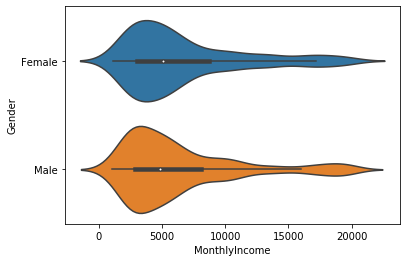

In [281]:
#Viewing the Gender and Attrition using violinplot
sns.violinplot(x='MonthlyIncome',y='Gender',data=df)

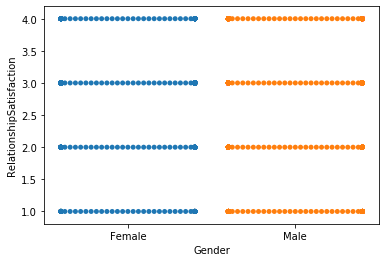

In [282]:
# Viewing the RelationshipSatisfaction using swarmplot
sns.swarmplot(x='Gender',y='RelationshipSatisfaction',data=df)

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


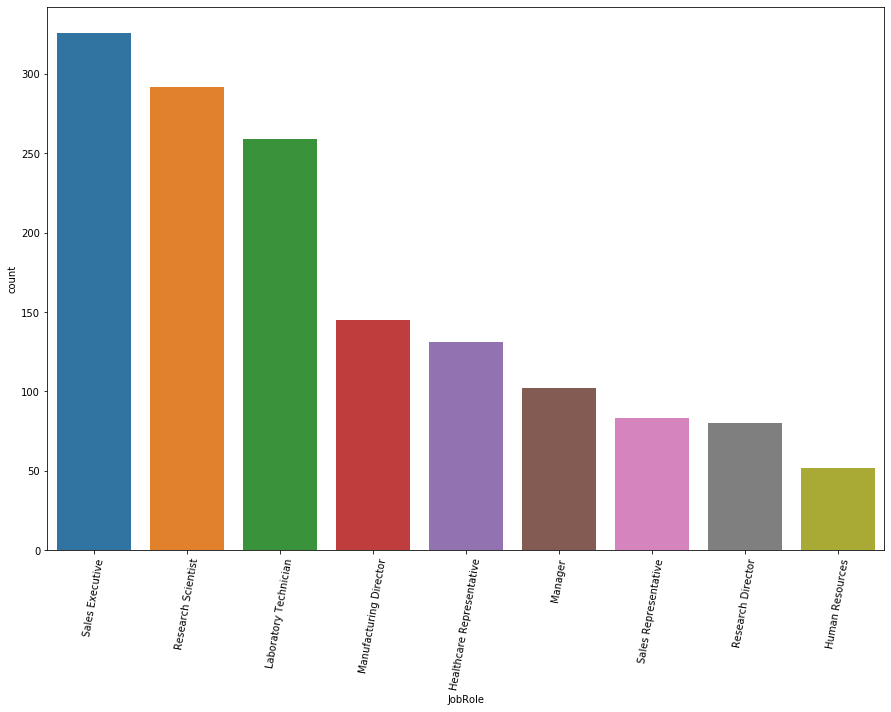

In [86]:
#Viewing the Job role using countplot
plt.figure(figsize=(15,10))
print(df['JobRole'].value_counts())
sns.countplot(df['JobRole'])
plt.xticks(rotation=80)
plt.show()

Sales Executive count is high, more people works as sales executive

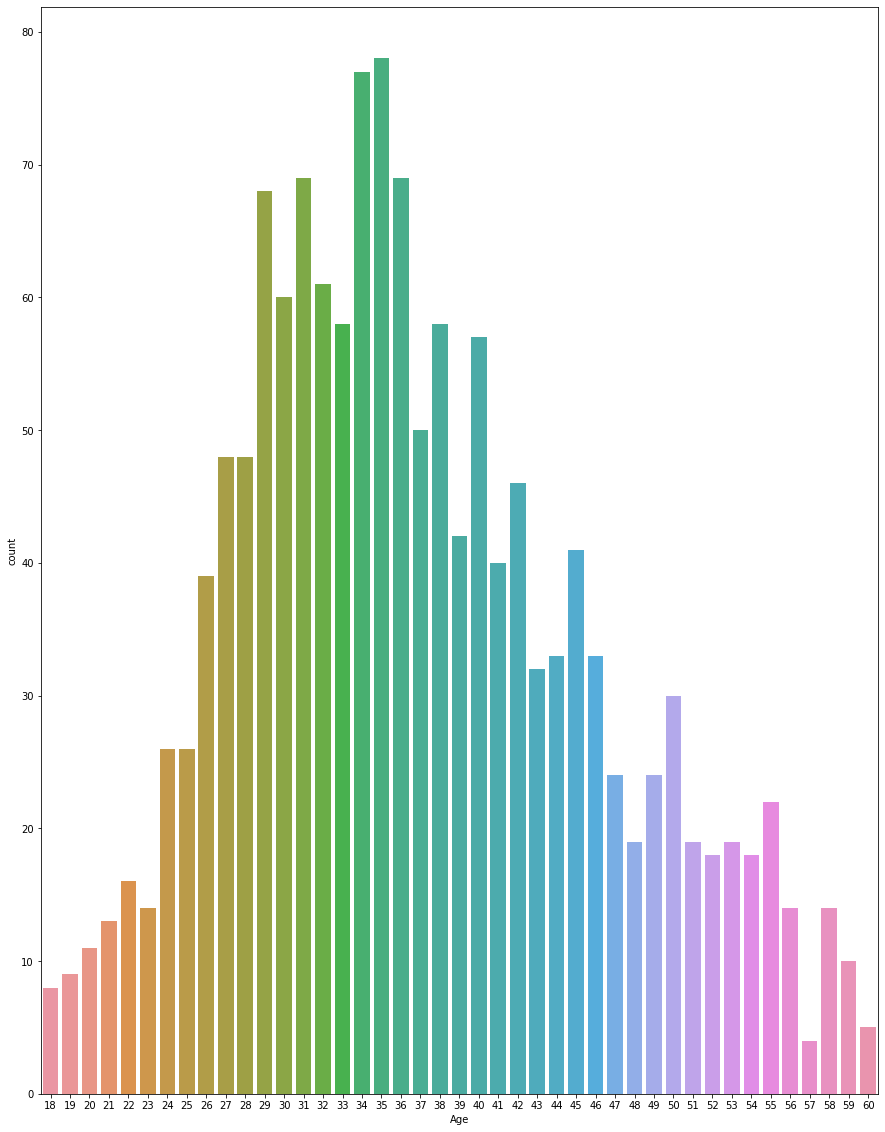

In [93]:
#Viewing the Age using Countplot
plt.figure(figsize=(15,20))
sns.countplot(df['Age'])

In [101]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


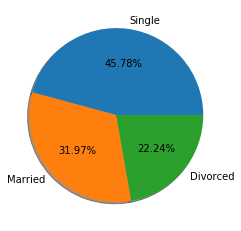

In [109]:
# Viewing the Marital Status using Pie chart
print(df['MaritalStatus'].value_counts())
label=['Single', 'Married', 'Divorced']
figure,ax=plt.subplots()
ax.pie(df['MaritalStatus'].value_counts(),labels=label,autopct='%1.2f%%',shadow=True)
plt.show()

In [104]:
df['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [106]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

3    1244
4     226
Name: PerformanceRating, dtype: int64


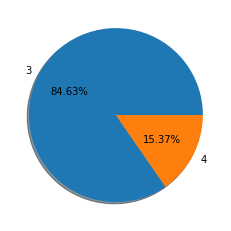

In [108]:
# Viewing the rating using piechart
print(df['PerformanceRating'].value_counts())
label=['3','4']
figure,ax=plt.subplots()
ax.pie(df['PerformanceRating'].value_counts(),labels=label,autopct='%1.2f%%',shadow=True)
plt.show()

More people got 3 ratings, less people got 4 rating

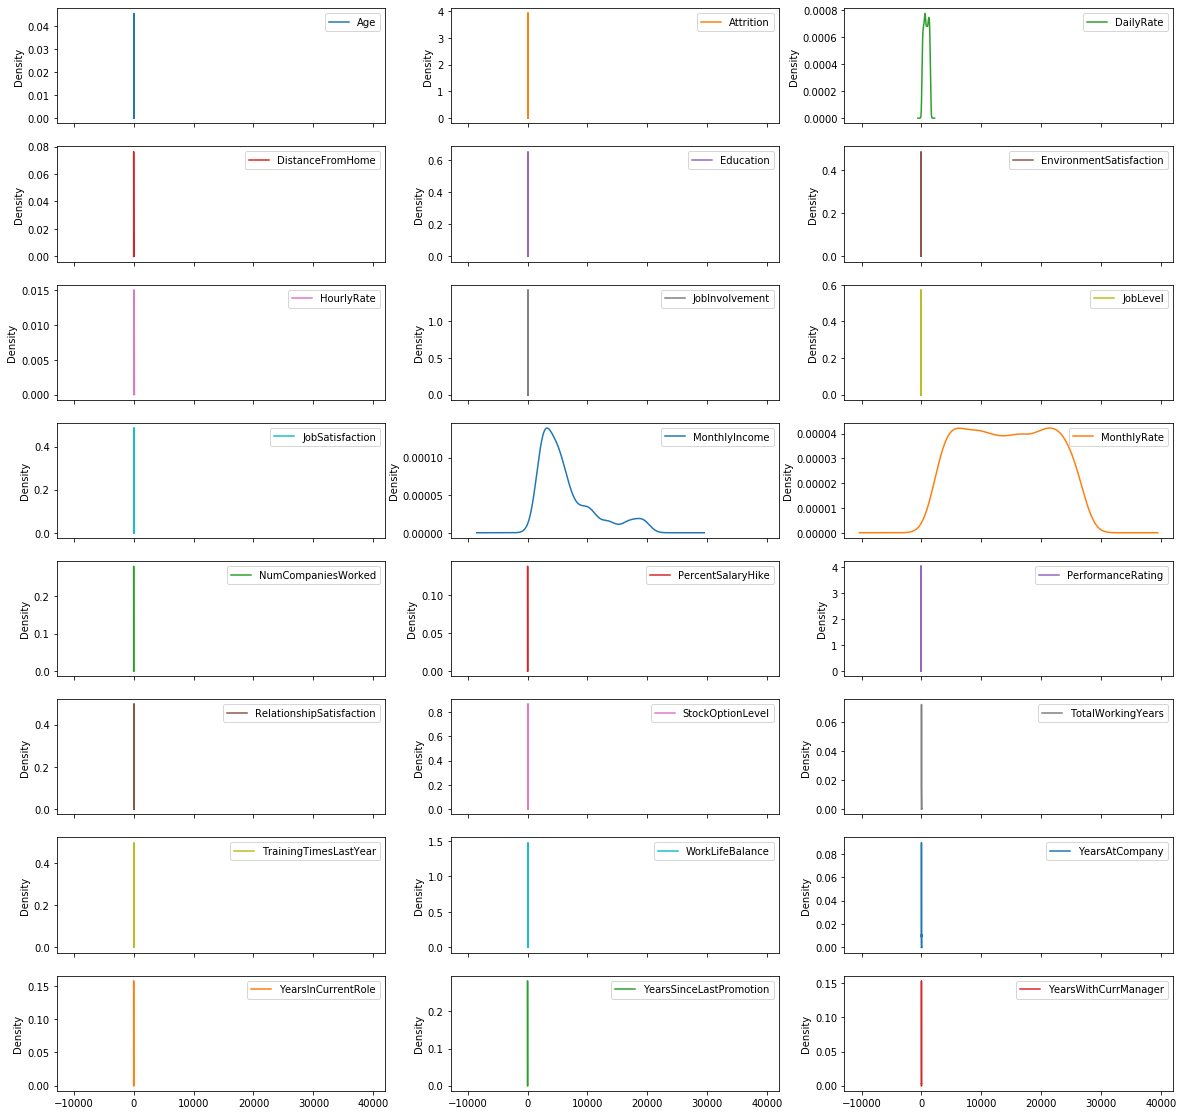

In [111]:
# Viewing the Kernel Density Estimator in data
df.plot(kind='kde',subplots=True,layout=(10,3),figsize=(20,25))
plt.show()

In [284]:
# Checking the Numerical Columns in data

numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_data.append(i)
print(numerical_data)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


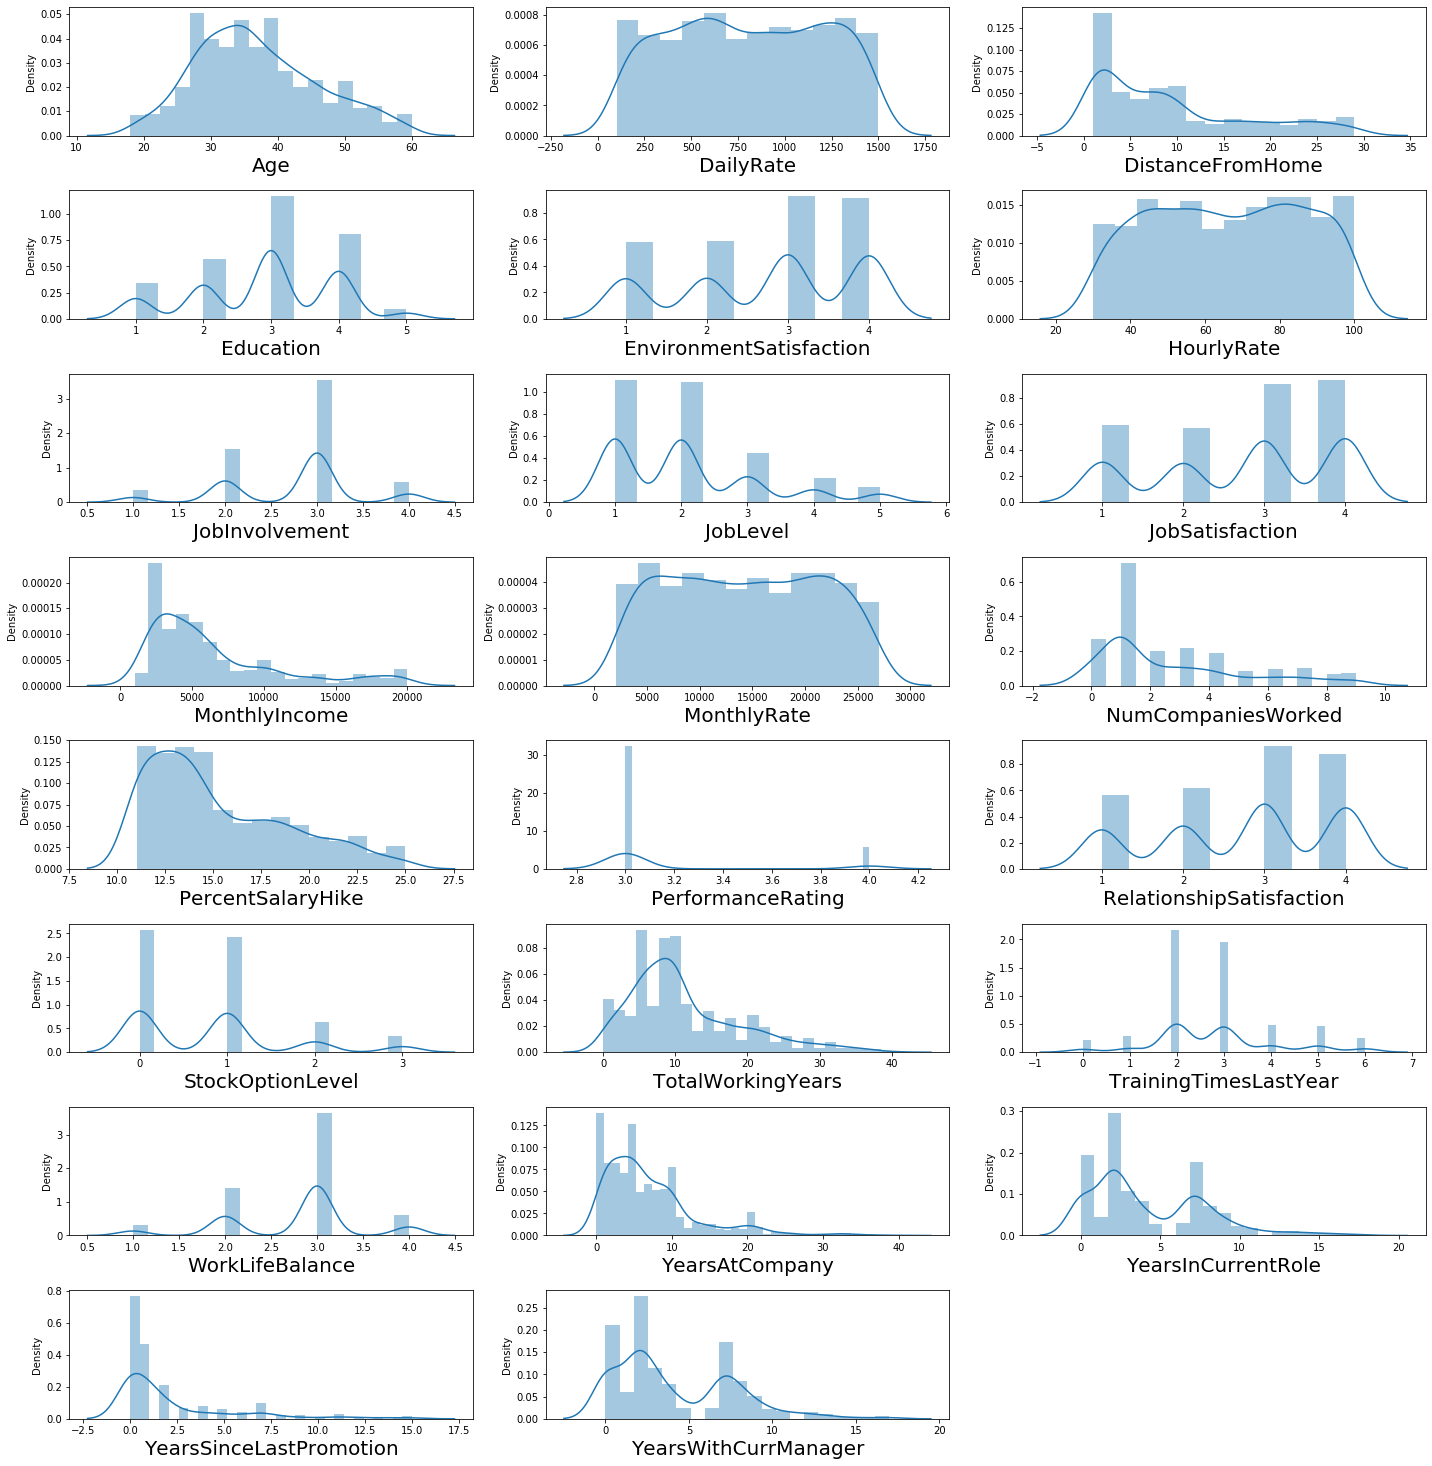

In [285]:
#Viewing the data using distribution plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in numerical_data:
    if plotnumber<=24:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

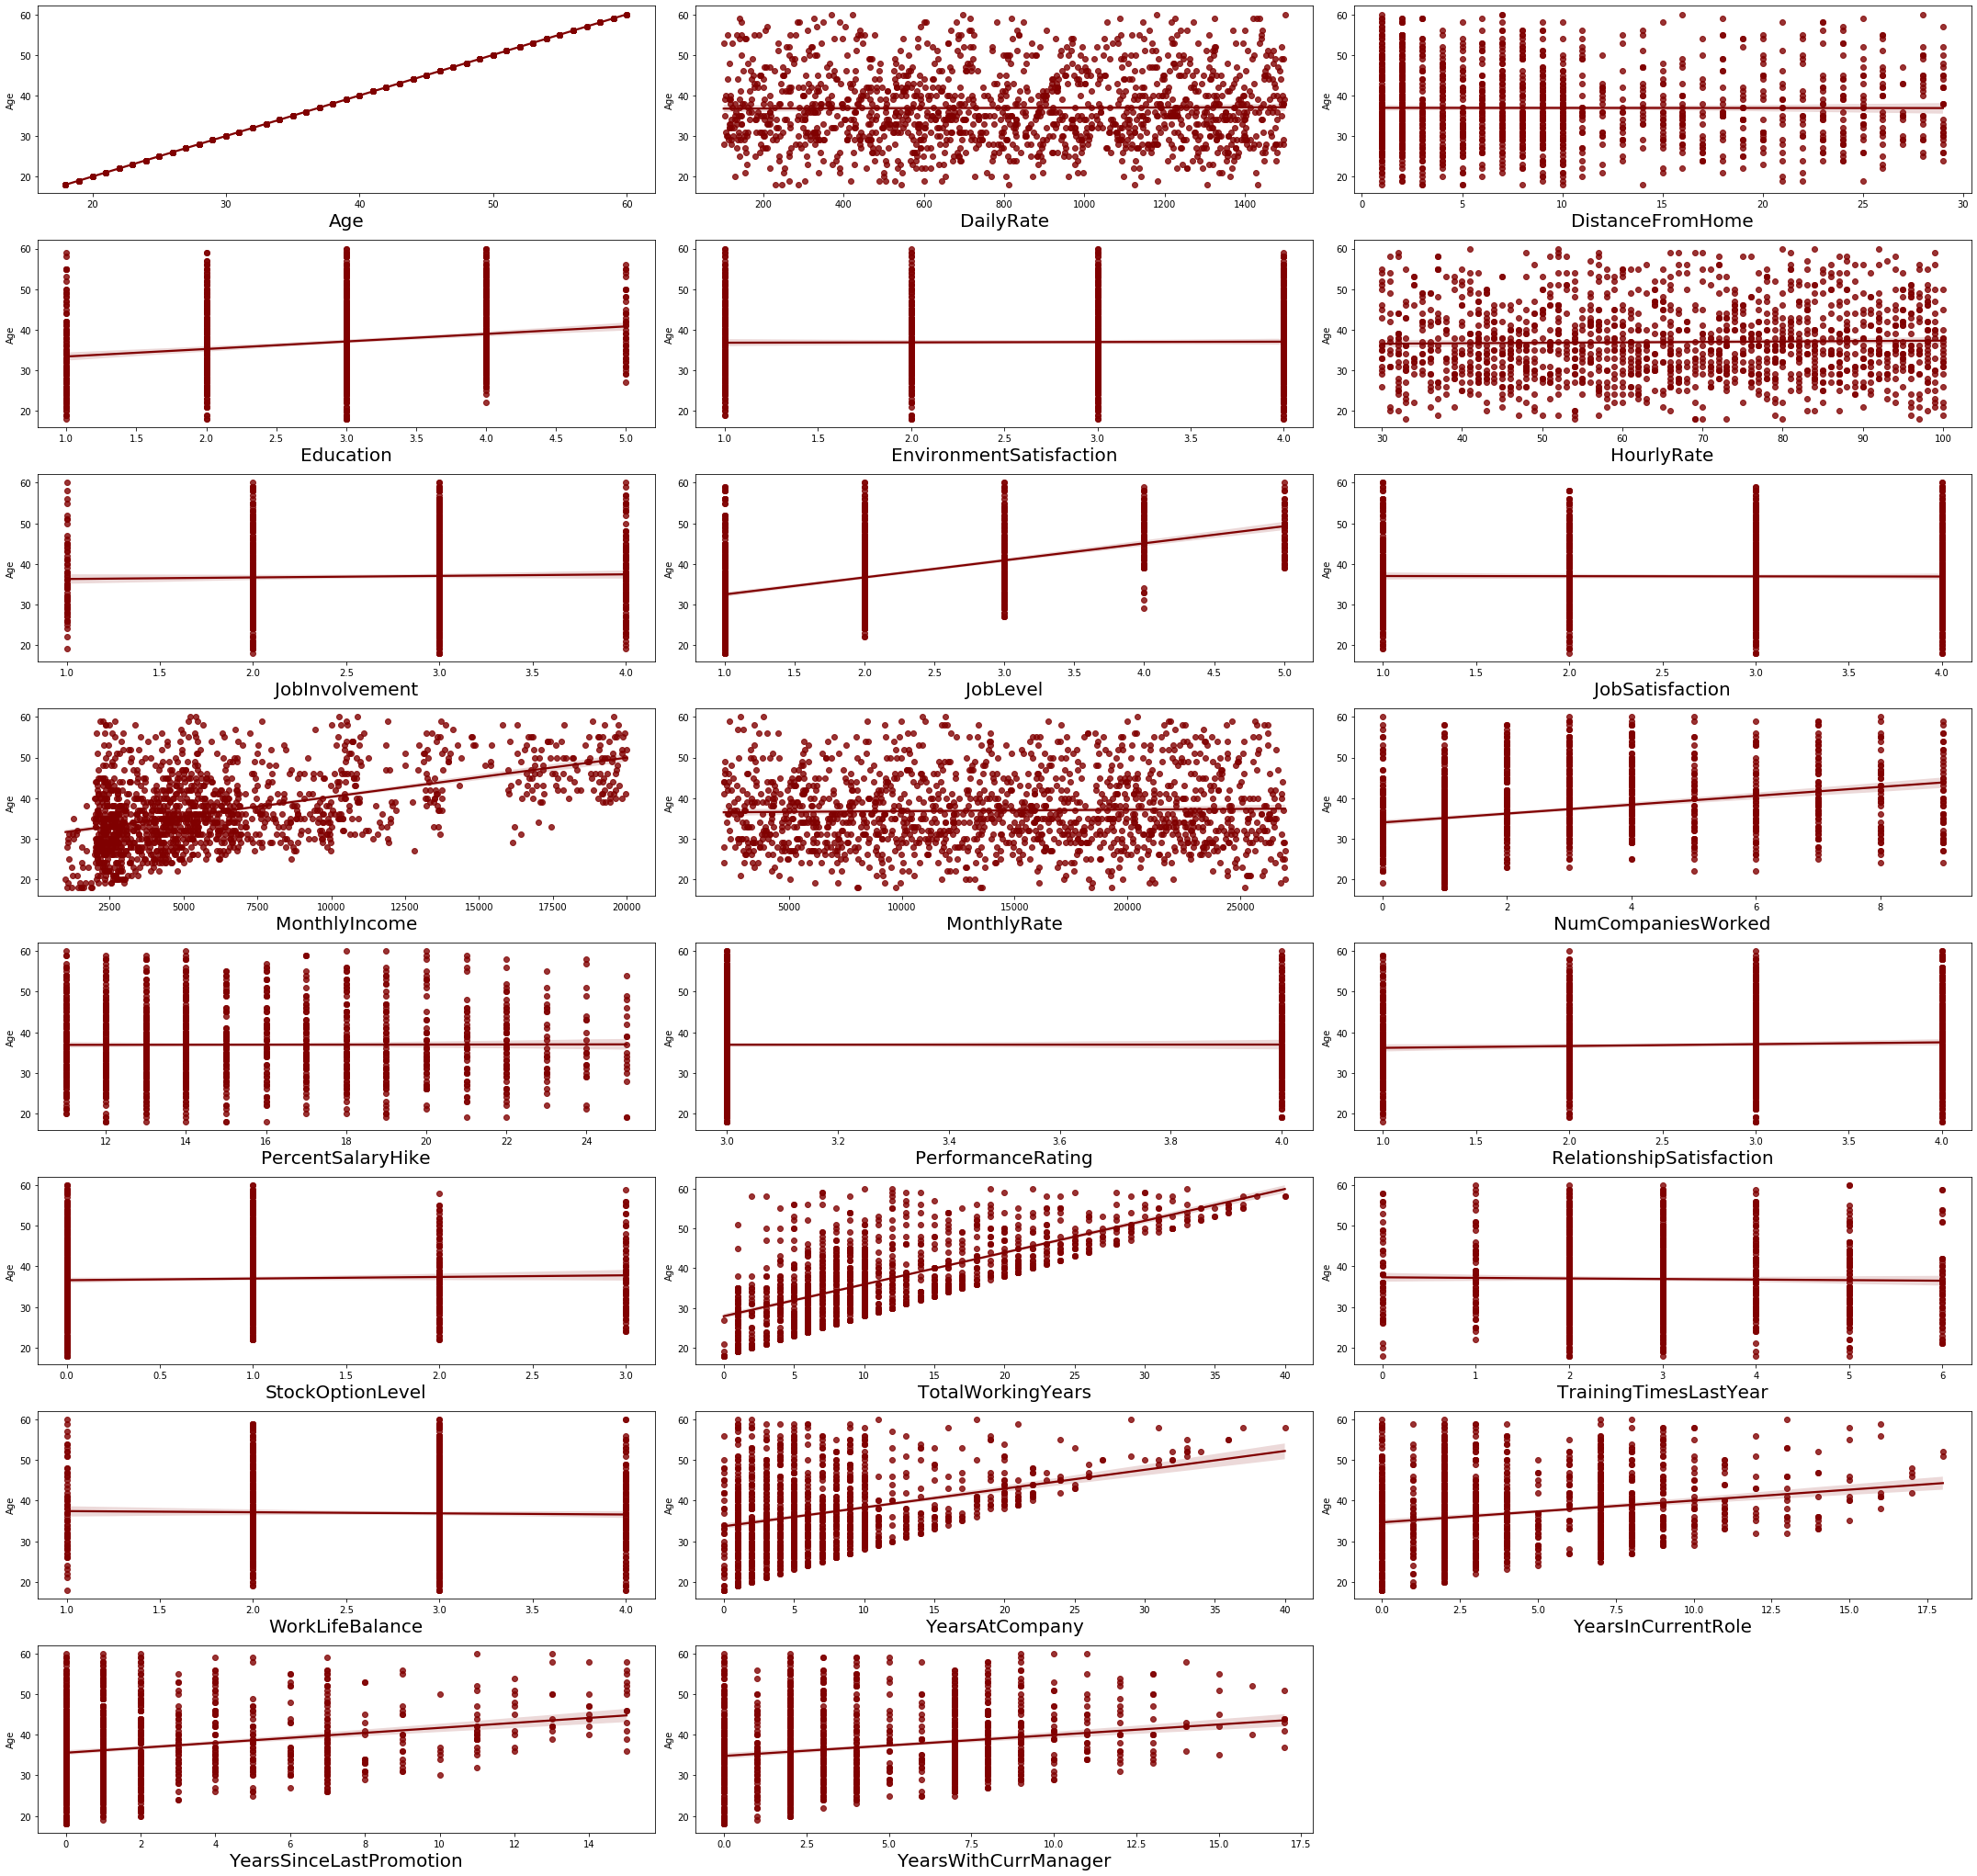

In [287]:
# Viewing the data using regression plot
plt.figure(figsize=(30,35))
plotnumber=1
for column in numerical_data:
    if plotnumber<=24:
        ax=plt.subplot(10,3,plotnumber)
        sns.regplot(df[column],df['Age'],color='maroon')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

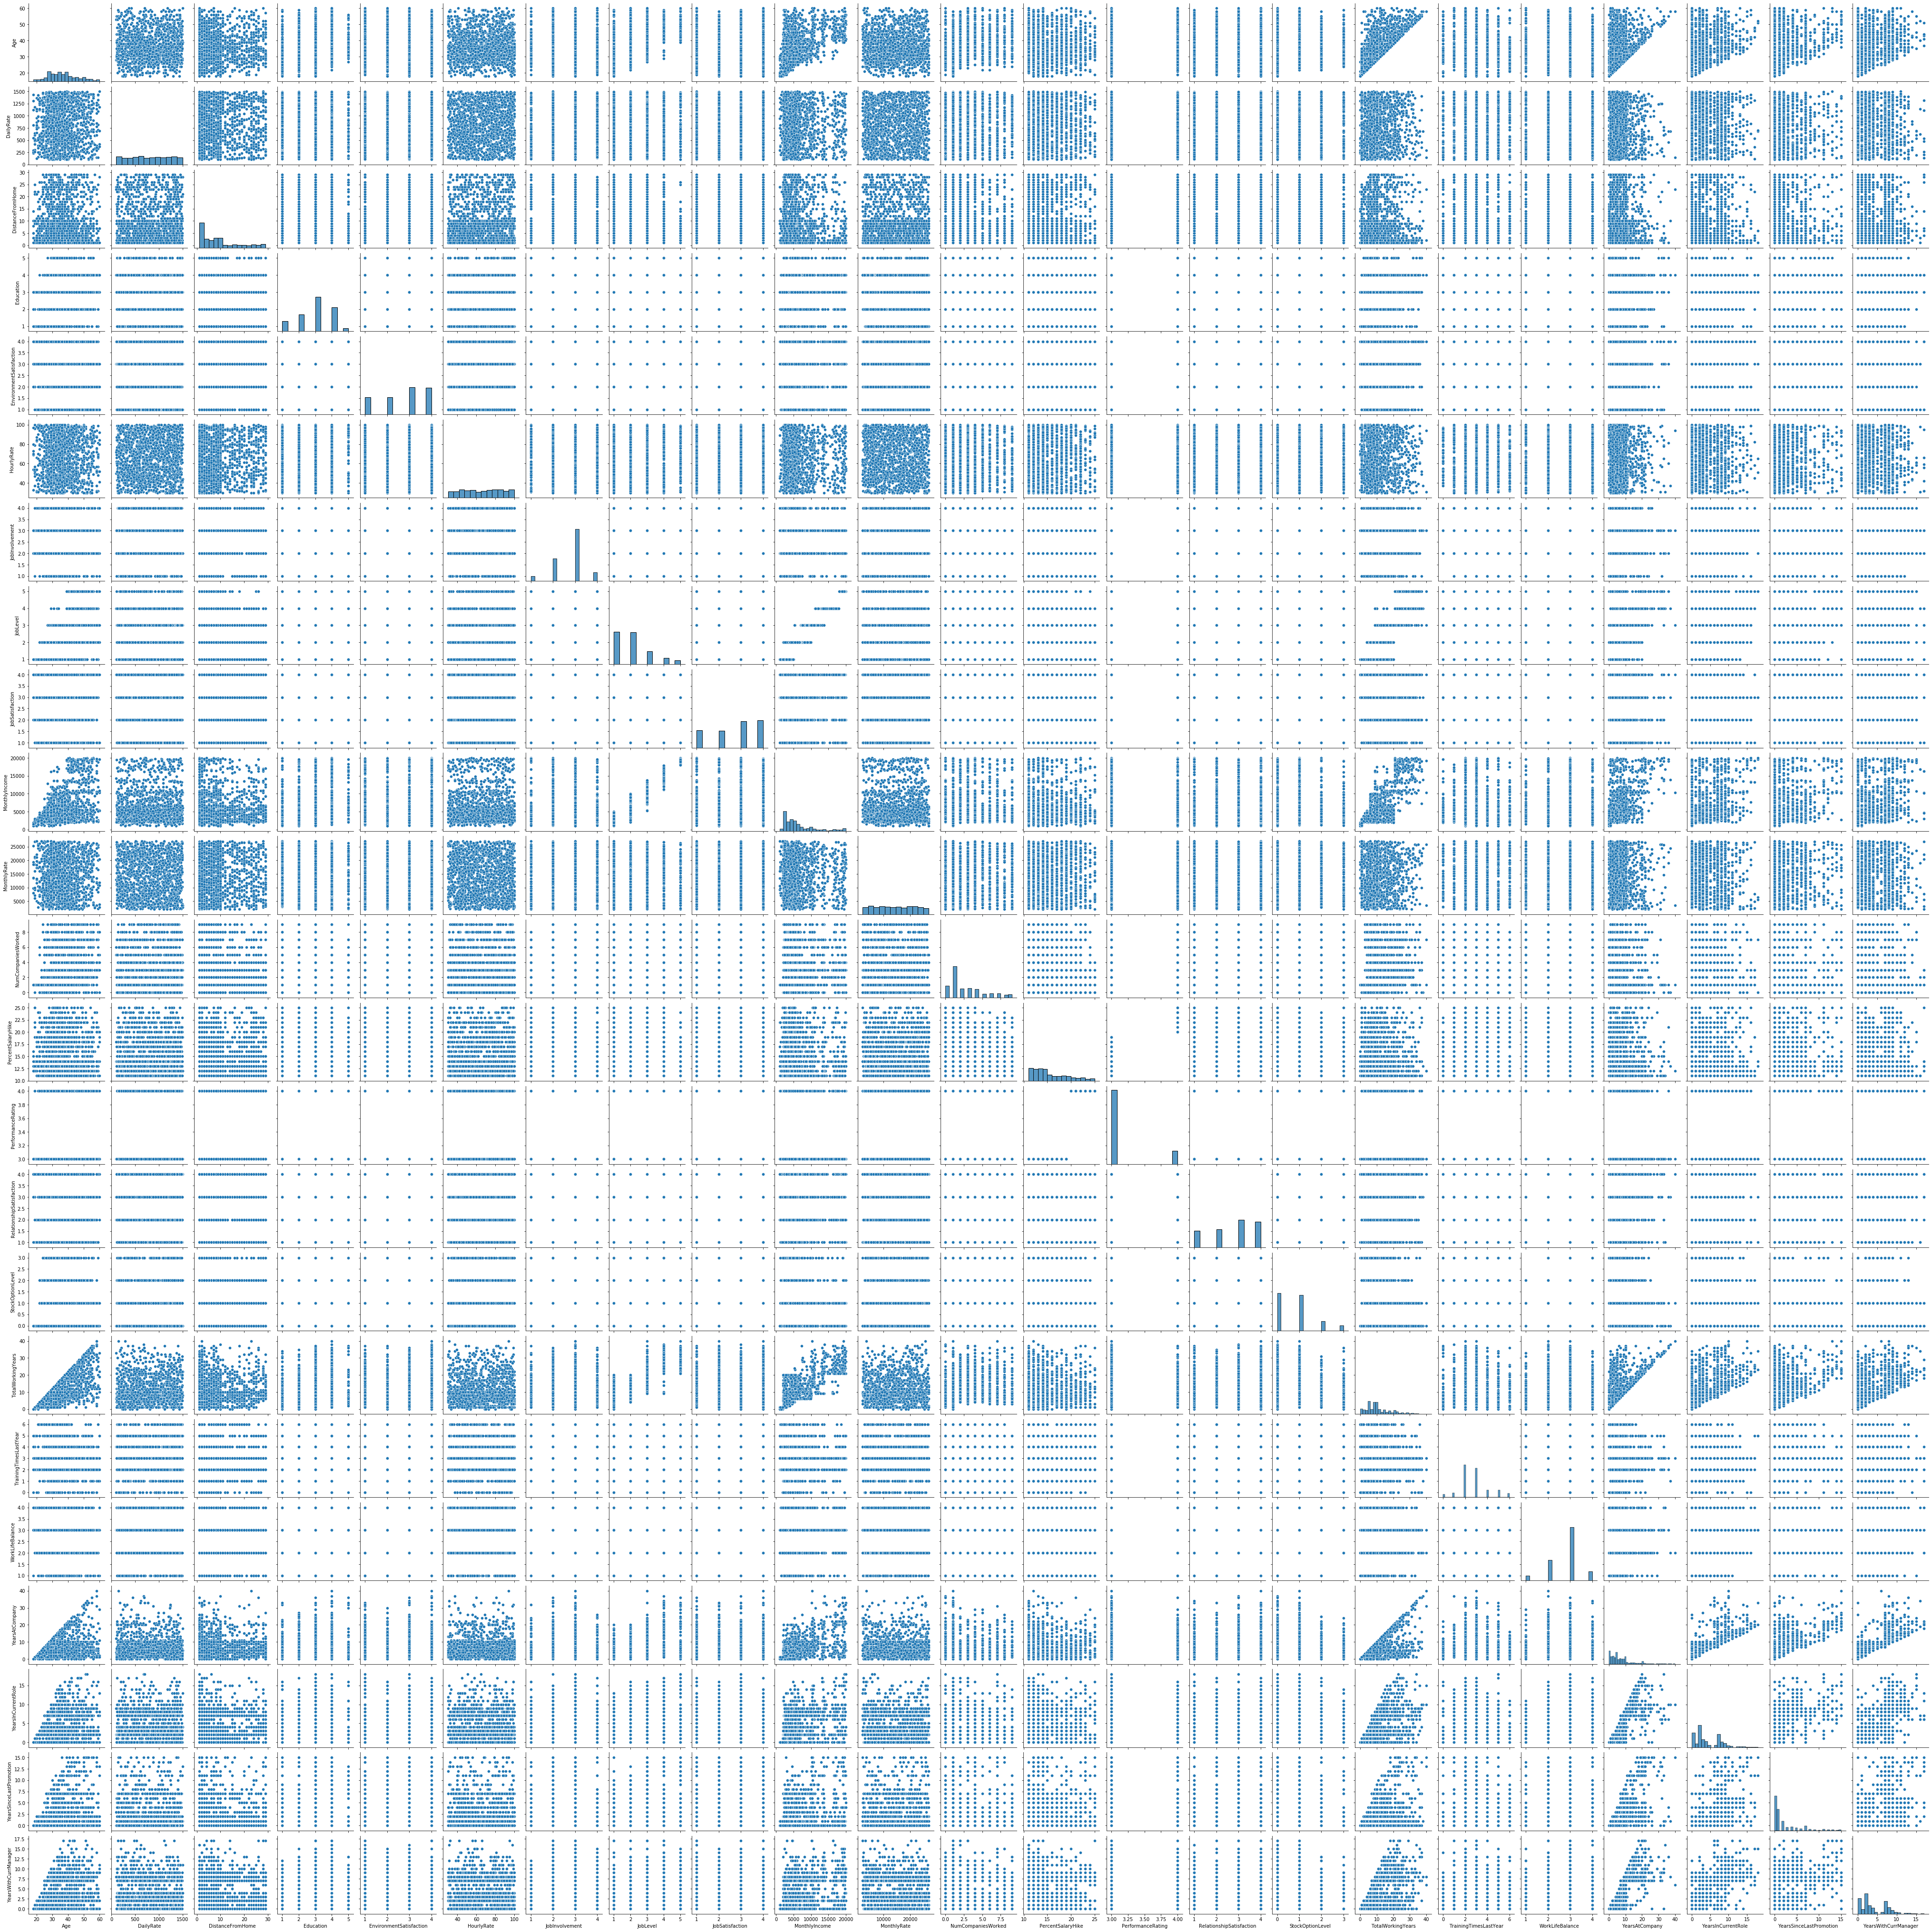

In [288]:
#Viewing the data using pairplot
sns.pairplot(df)

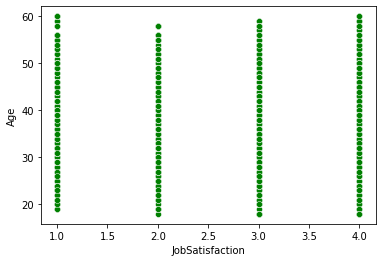

In [289]:
sns.scatterplot(df['JobSatisfaction'],df['Age'],color='green')

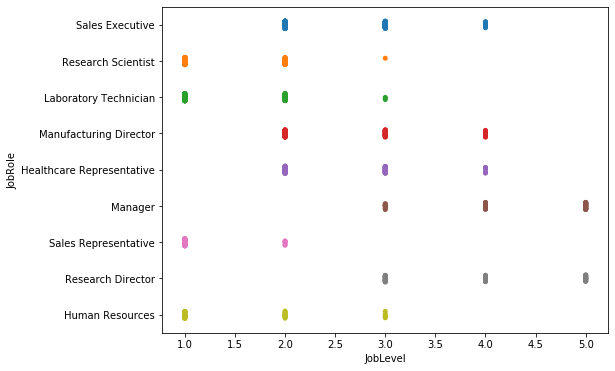

In [290]:
plt.figure(figsize=(8,6))
sns.stripplot(x=df['JobLevel'],y=df['JobRole'])

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


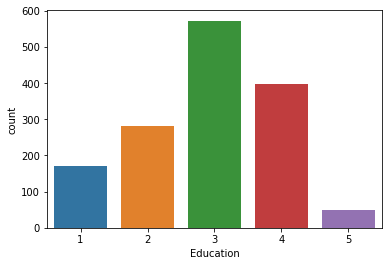

In [291]:
print(df["Education"].value_counts())
sns.countplot(df['Education'])

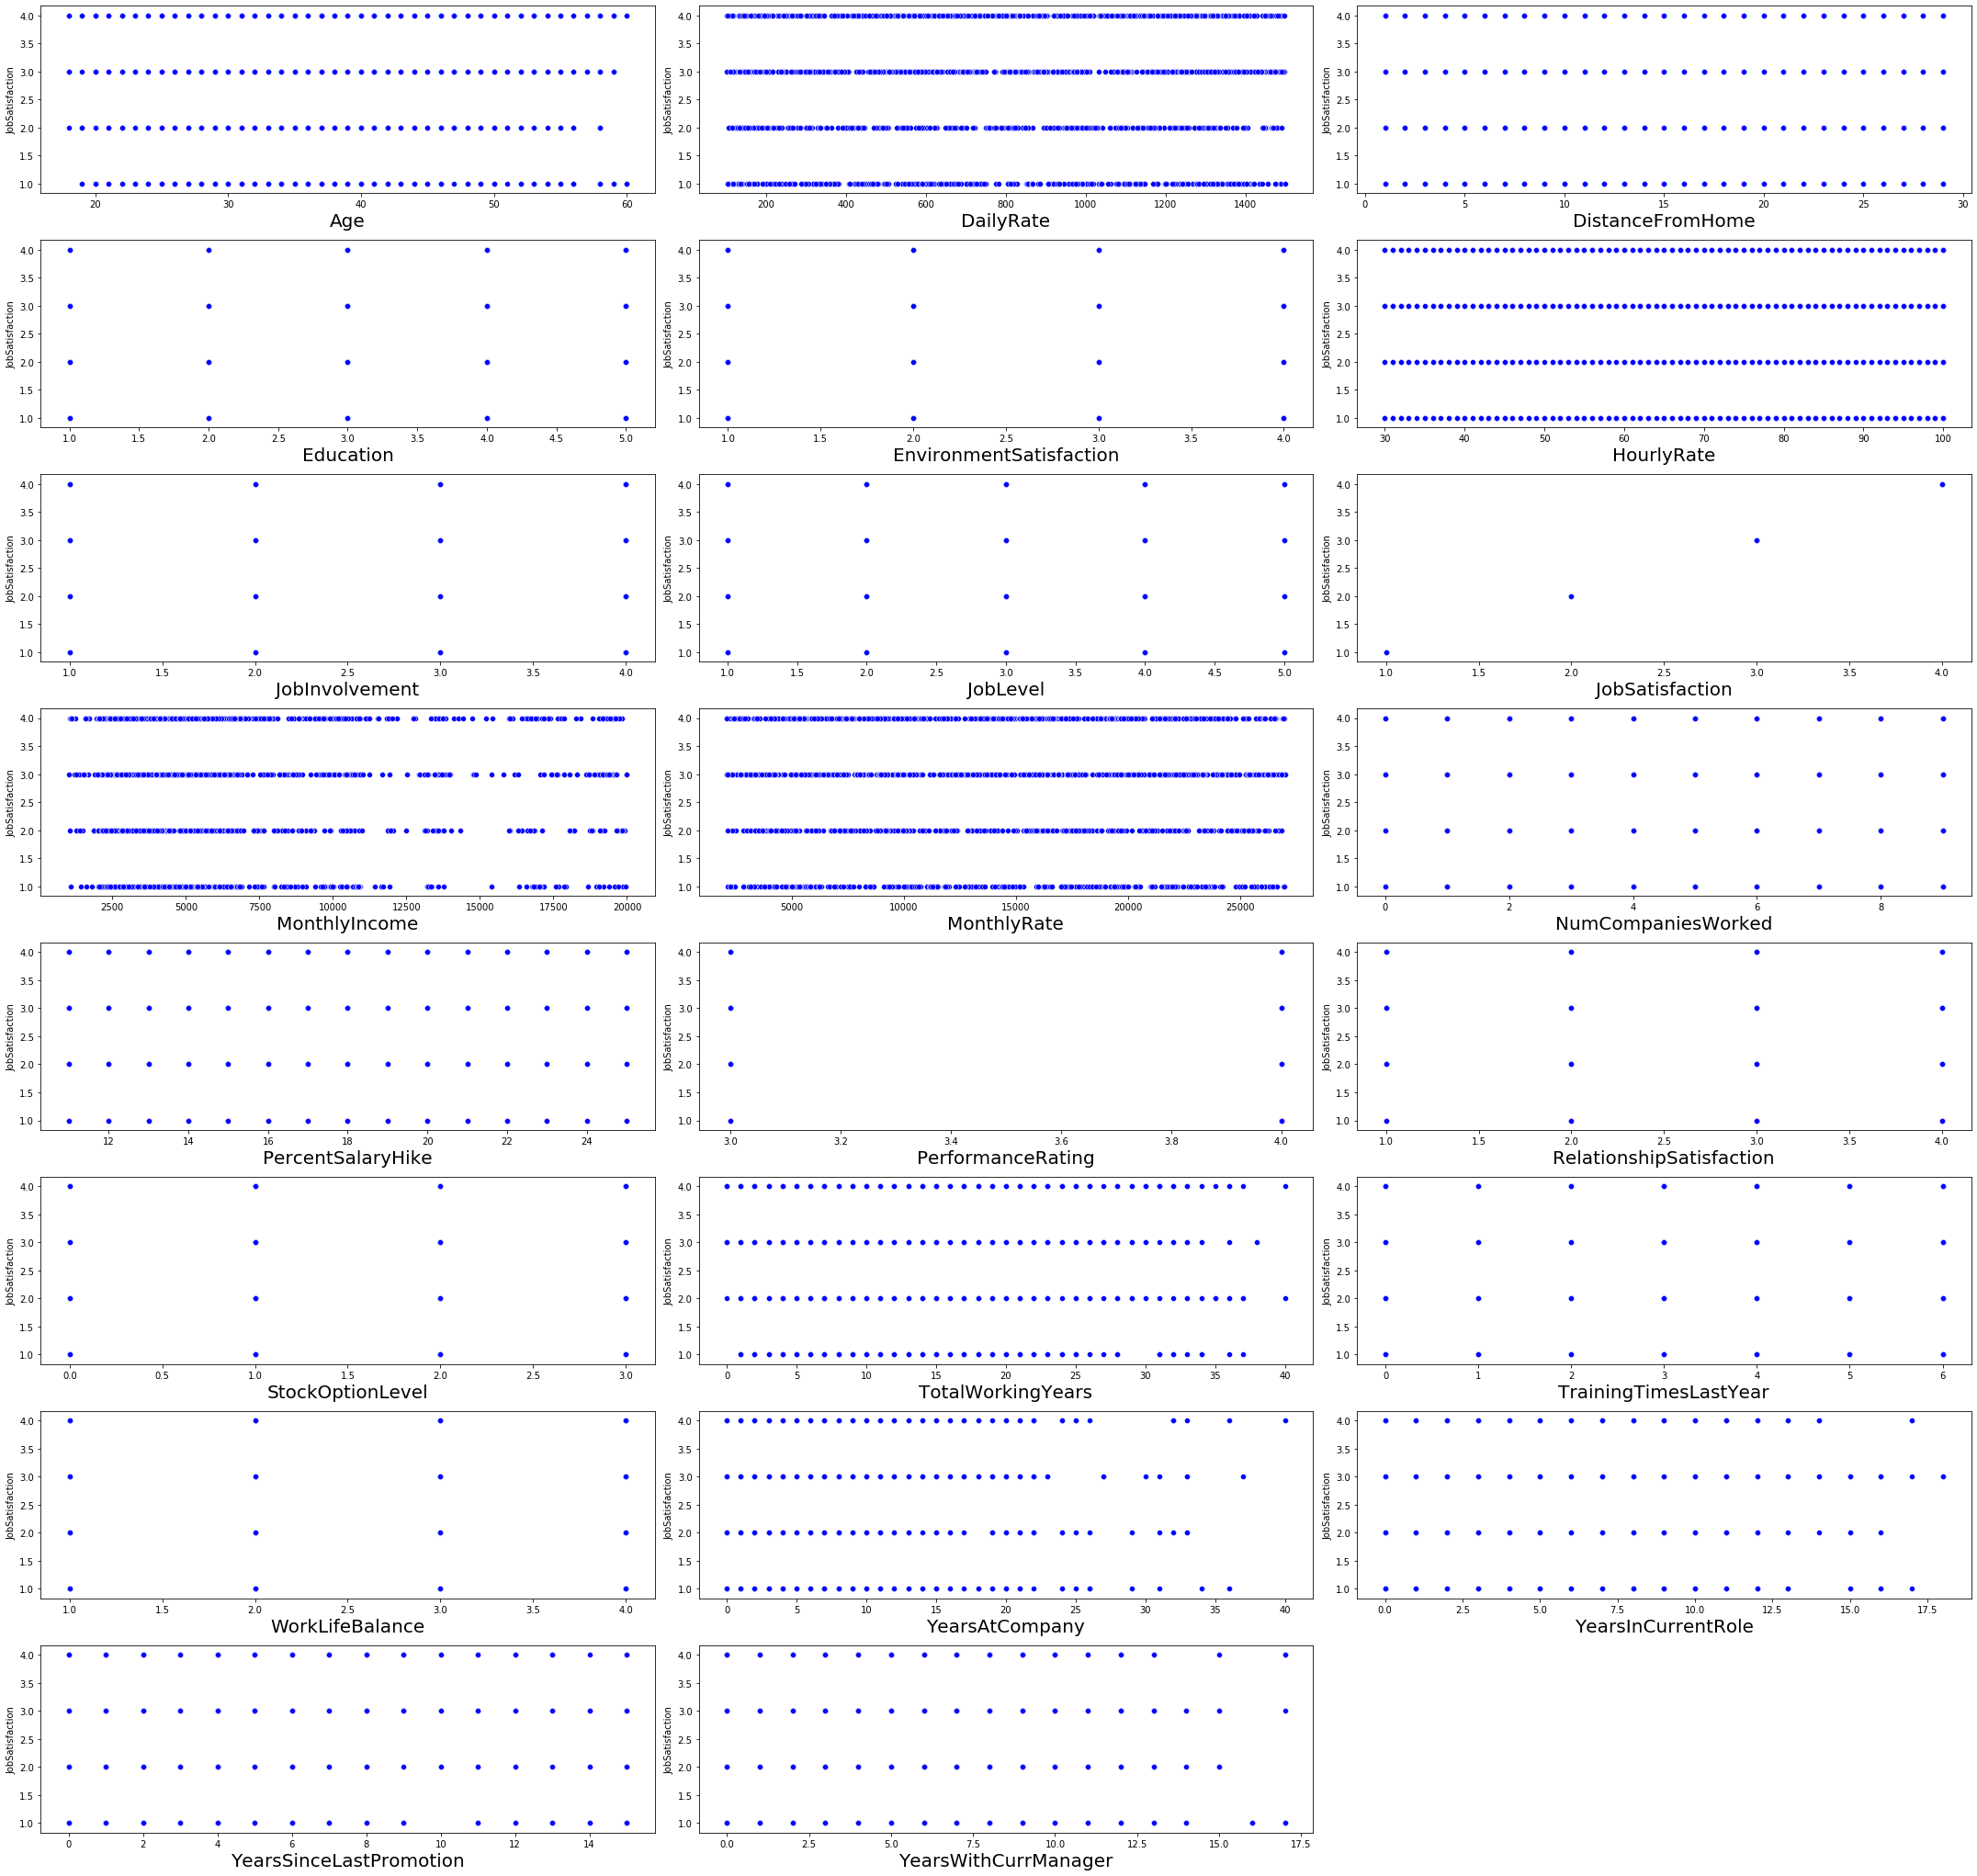

In [292]:
plt.figure(figsize=(30,35))
plotnumber=1
for column in numerical_data:
    if plotnumber<=24:
        ax=plt.subplot(10,3,plotnumber)
        sns.scatterplot(df[column],df['JobSatisfaction'],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

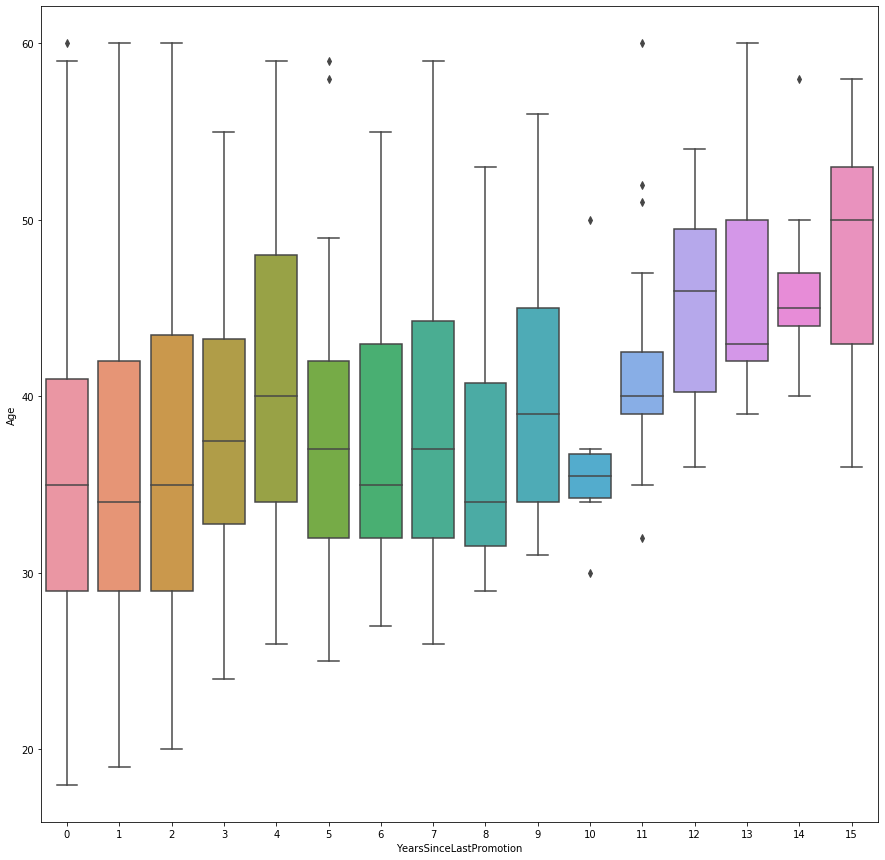

In [295]:
plt.figure(figsize=(15,15))
sns.boxplot(x=df['YearsSinceLastPromotion'],y=df['Age'],data=df)

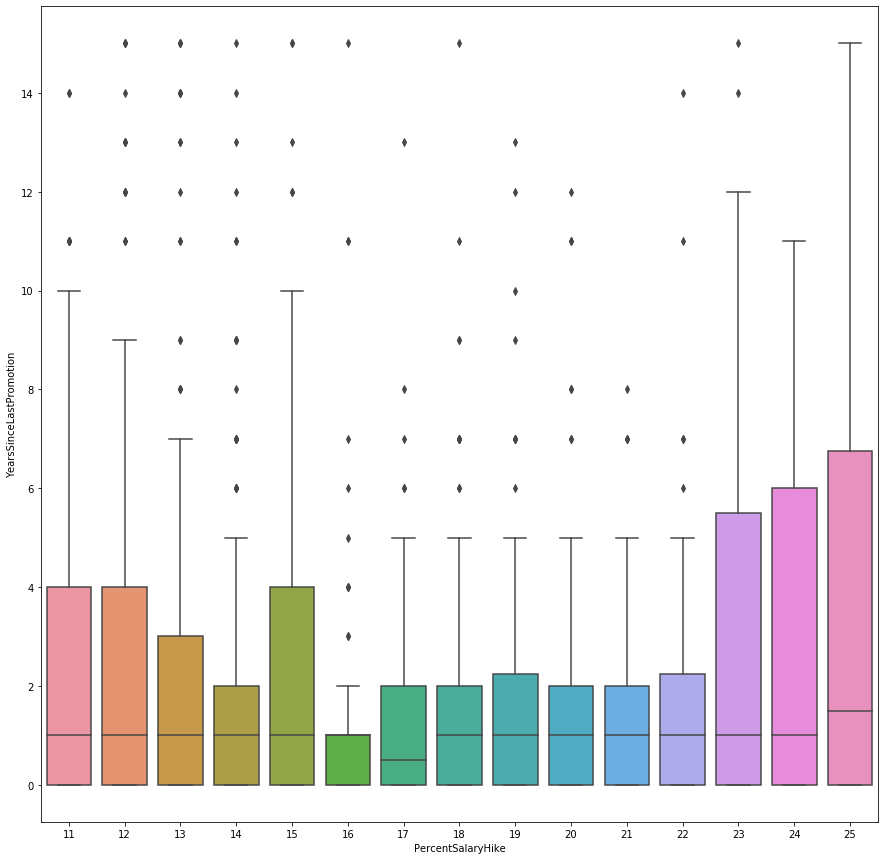

In [297]:
plt.figure(figsize=(15,15))
sns.boxplot(x=df['PercentSalaryHike'],y=df['YearsSinceLastPromotion'],data=df)

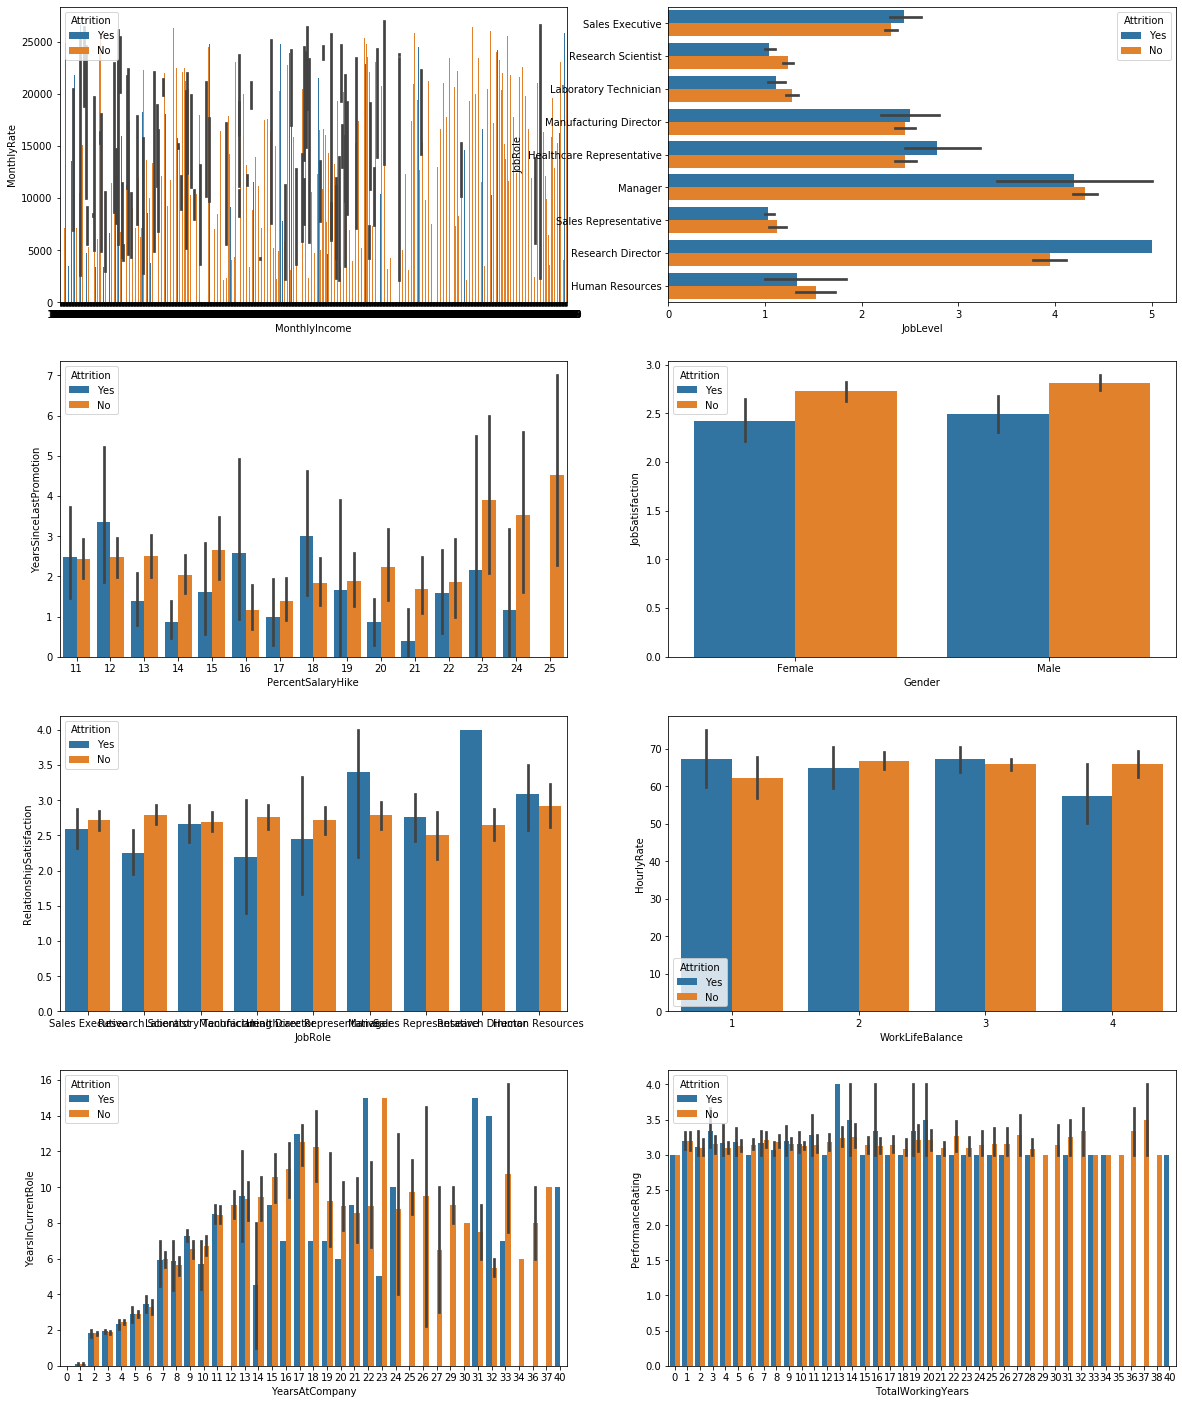

In [300]:
# Viewing the data using bar plot for various features
figure,axes=plt.subplots(4,2,figsize=(20,25))

sns.barplot(x='Gender',y='JobSatisfaction',hue='Attrition',ax=axes[1,1],data=df)

sns.barplot(x='PercentSalaryHike',y='YearsSinceLastPromotion',hue='Attrition',ax=axes[1,0],data=df)

sns.barplot(x='JobLevel',y='JobRole',hue='Attrition',ax=axes[0,1],data=df)

sns.barplot(x='MonthlyIncome',y='MonthlyRate',hue='Attrition',ax=axes[0,0],data=df)

sns.barplot(x='JobRole',y='RelationshipSatisfaction',hue='Attrition',ax=axes[2,0],data=df)

sns.barplot(x='WorkLifeBalance',y='HourlyRate',hue='Attrition',ax=axes[2,1],data=df)

sns.barplot(x='YearsAtCompany',y='YearsInCurrentRole',hue='Attrition',ax=axes[3,0],data=df)

sns.barplot(x='TotalWorkingYears',y='PerformanceRating',hue='Attrition',ax=axes[3,1],data=df)

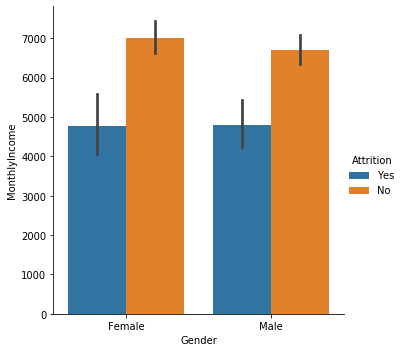

In [301]:
sns.catplot(x='Gender',y='MonthlyIncome',data=df,hue='Attrition',kind='bar')

<Figure size 1440x1800 with 0 Axes>

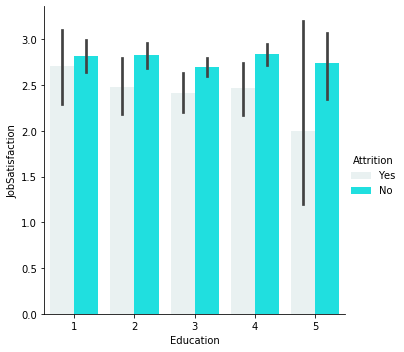

In [302]:
plt.figure(figsize=(20,25))
sns.catplot(x='Education',y='JobSatisfaction',data=df,hue='Attrition',kind='bar',color='aqua')

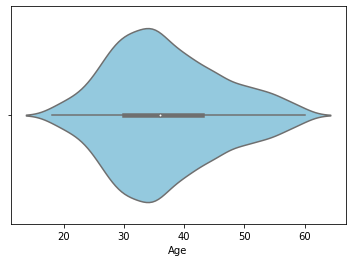

In [305]:
sns.violinplot(df['Age'],color='skyblue')

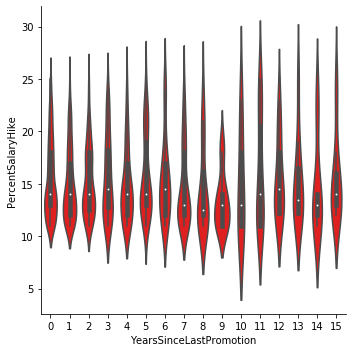

In [306]:
sns.catplot(x='YearsSinceLastPromotion',y='PercentSalaryHike',kind='violin',data=df,color='red')

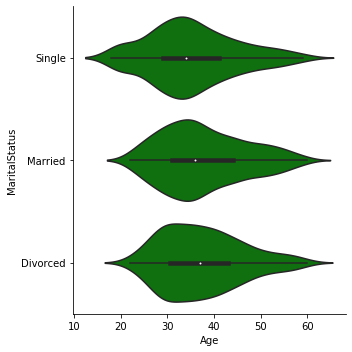

In [307]:
sns.catplot(x='Age',y='MaritalStatus',data=df,kind='violin',color='green')

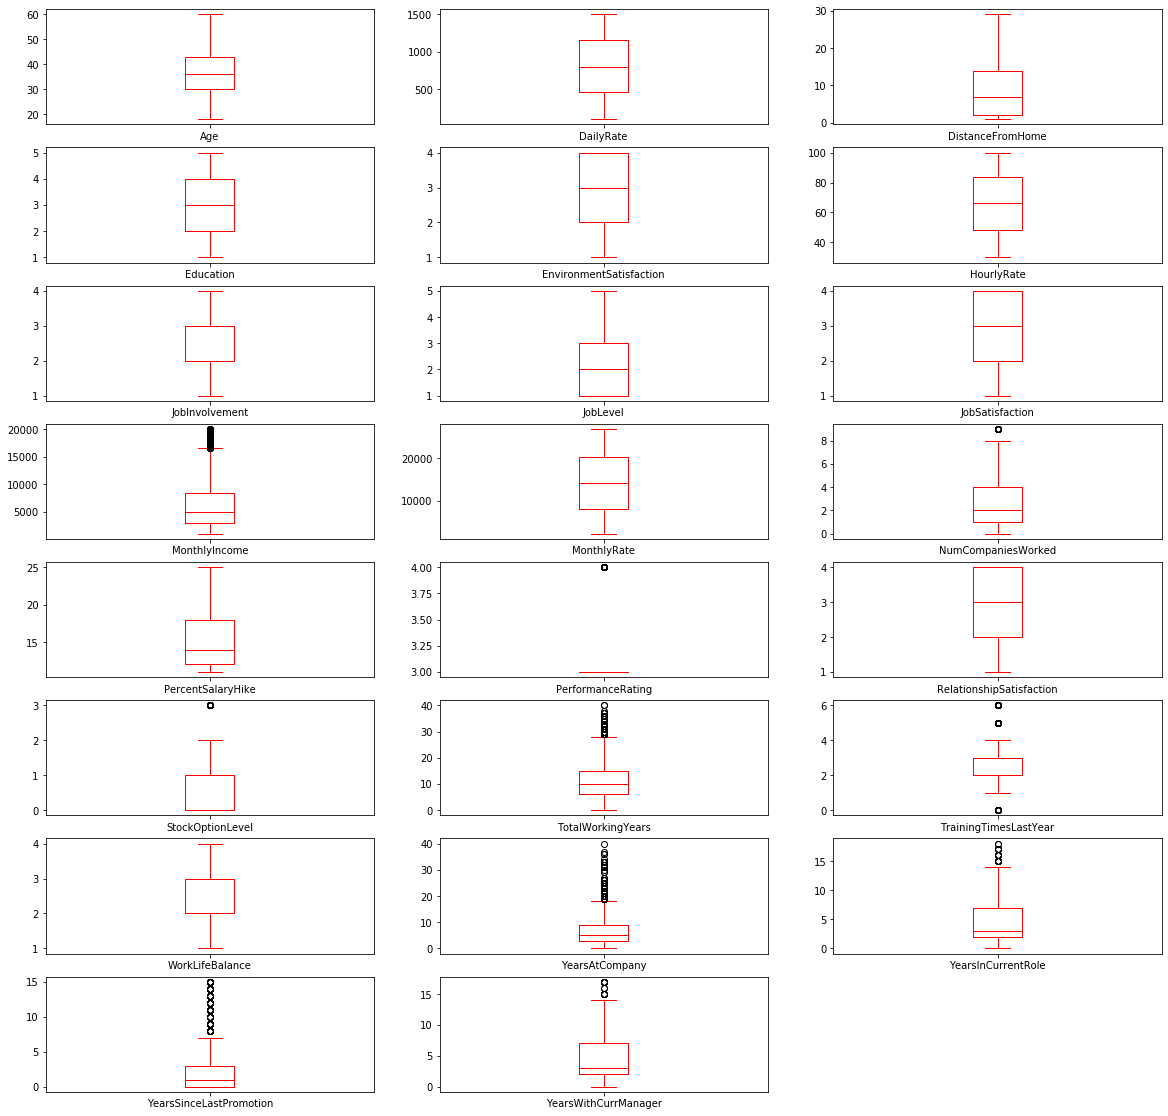

In [308]:
#Checking the Outliers using boxplot
df.plot(kind='box',subplots=True,layout=(10,3),figsize=(20,25),color='red')
plt.show()

Outliers are present in data

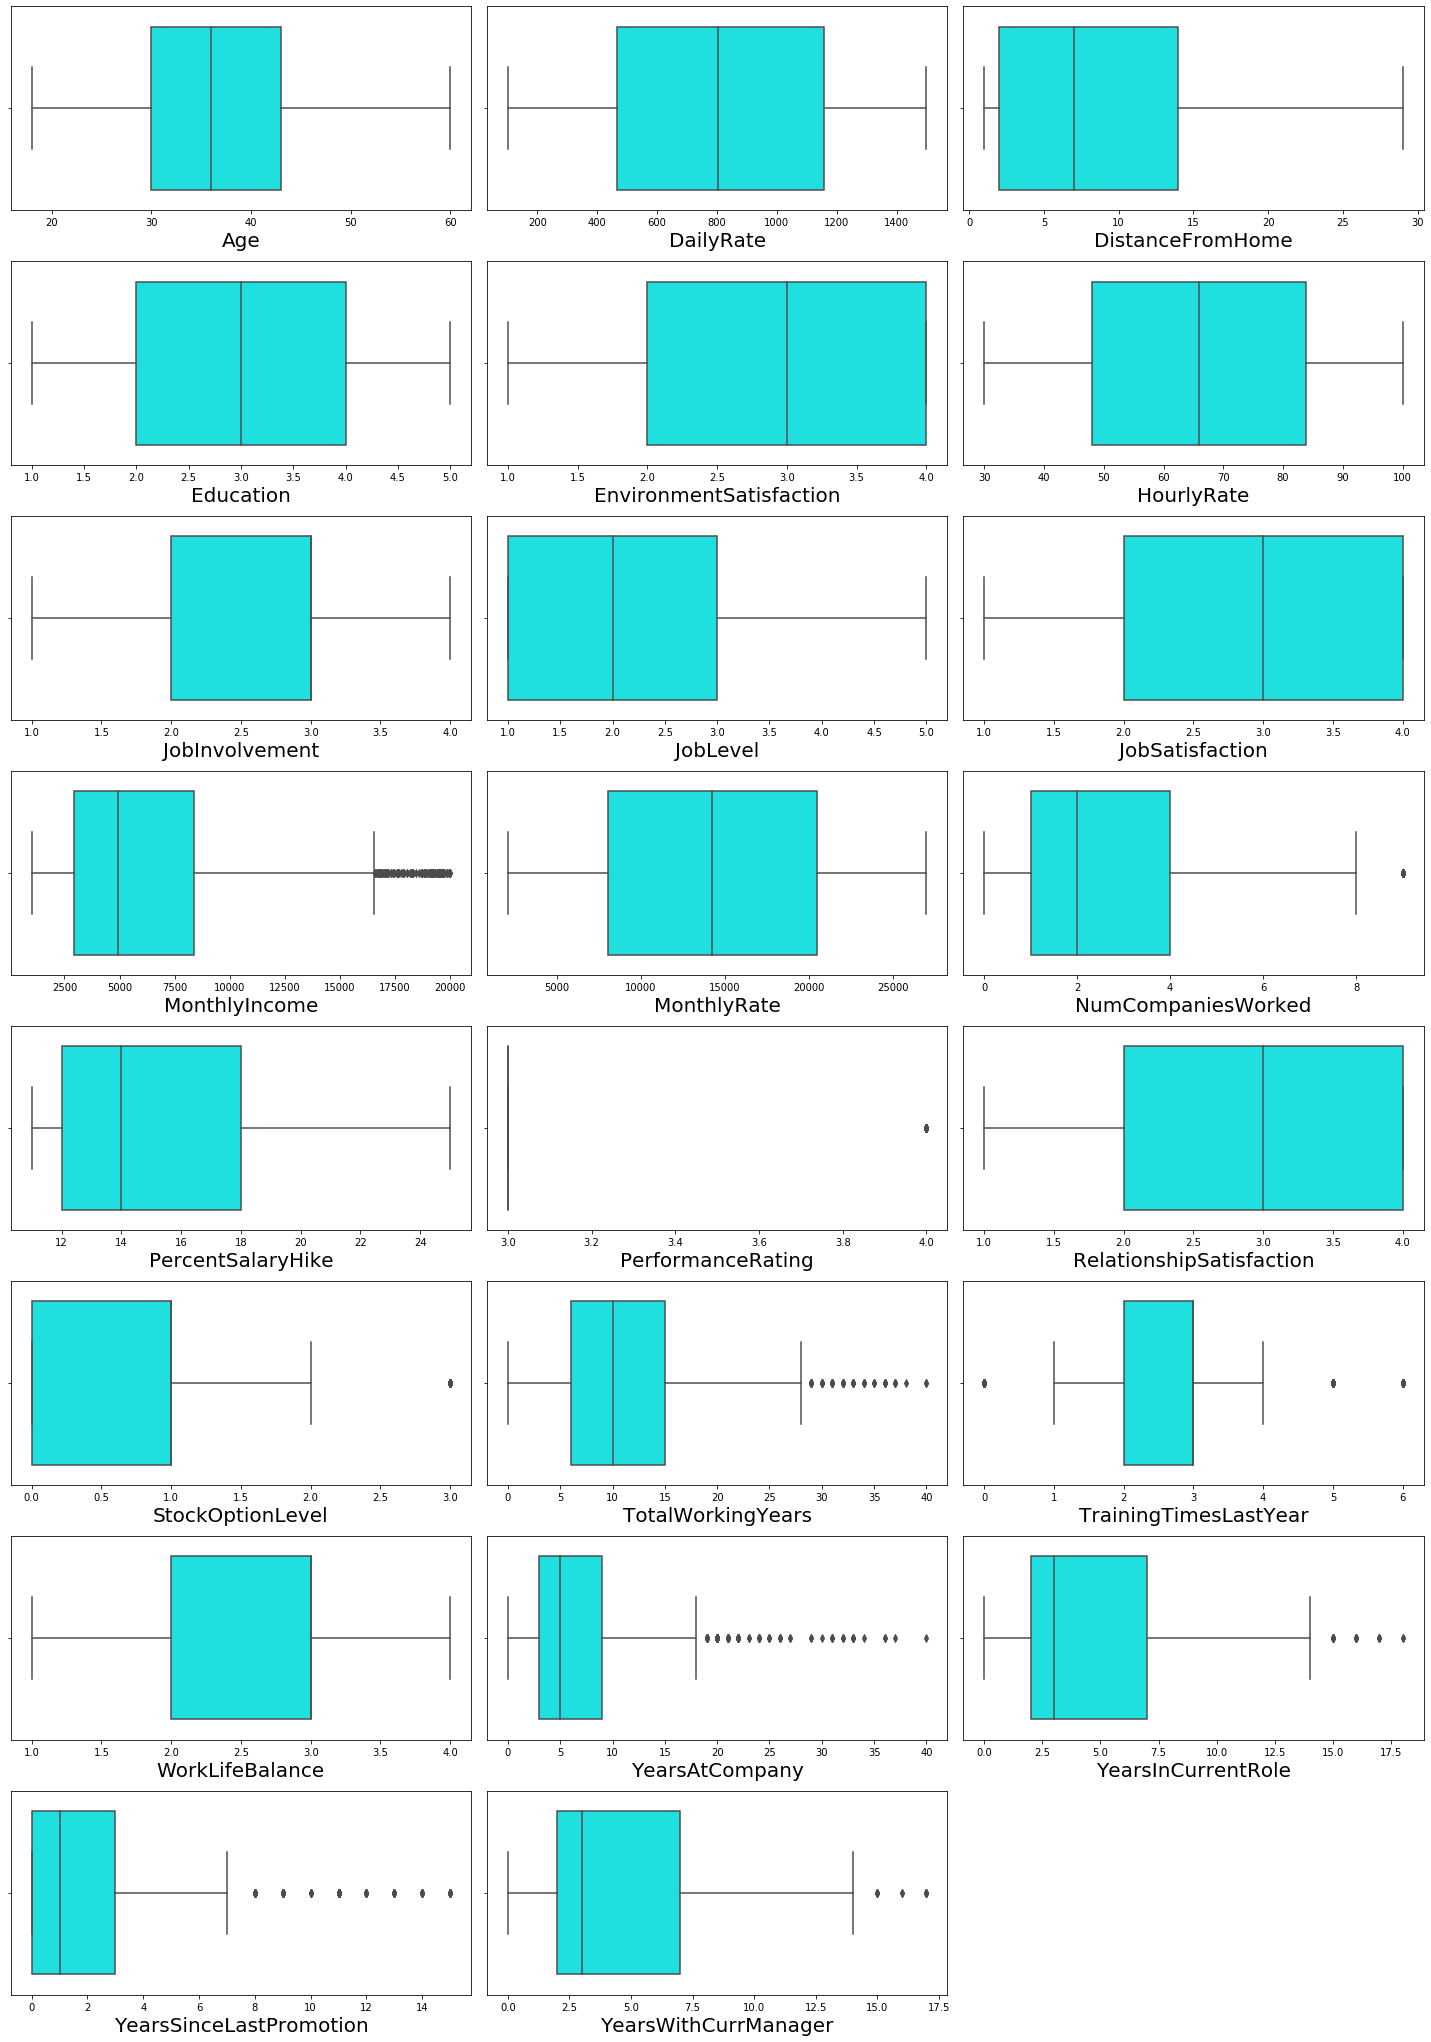

In [309]:
plt.figure(figsize=(20,35))
plotnumber=1

for column in df[numerical_data]:
    if plotnumber<=24:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='aqua')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

Outliers is present in Attrition, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsinCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

Let's removing the outliers using the ZScore

In [379]:
outliers=df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [380]:
z=np.abs(zscore(outliers))
z

array([[0.10834951, 2.12513592, 0.42623002, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [0.29171859, 0.67804939, 2.34615106, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.93765369, 1.32422583, 0.42623002, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [0.07669019, 0.67804939, 2.34615106, ..., 0.61549158, 0.67914568,
        0.31487349],
       [0.23647414, 0.27759435, 0.42623002, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.44597809, 0.27759435, 0.42623002, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [381]:
thresholds=3
df_new=df[(z<3).all(axis=1)]
df_new

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [382]:
df_new.shape

(1387, 35)

In [383]:
df.shape

(1470, 35)

In [384]:
data_loss=(1470-1387)/1470
data_loss*100

5.646258503401361

5.6% data is removed in the Outliers

# Skewness

In [385]:
df_new.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

Let's remove the skewness which is more than +5 and -5 in the data using the Power Transformer

In [386]:
from sklearn.preprocessing import PowerTransformer

In [387]:
skewed=['DistanceFromHome','JobInvolvement','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [388]:
scaled=PowerTransformer(method='yeo-johnson')

In [389]:
df_new[skewed]=scaled.fit_transform(df_new[skewed].values)
df_new[skewed]

DistanceFromHome  JobInvolvement  JobLevel  MonthlyIncome  \
0            -1.489968        0.322170  0.349828       0.386674   
1             0.244561       -1.065841  0.349828       0.144235   
2            -1.028366       -1.065841 -1.141761      -1.431153   
3            -0.698191        0.322170 -1.141761      -0.814425   
4            -1.028366        0.322170 -1.141761      -0.504453   
...                ...             ...       ...            ...   
1465          1.408969        2.016459  0.349828      -1.039557   
1466         -0.049519       -1.065841  1.133237       1.127335   
1467         -0.440553        2.016459  0.349828       0.424210   
1468         -1.028366       -1.065841  0.349828       0.222228   
1469          0.244561        2.016459  0.349828      -0.101930   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0               1.620671          -1.495549         -1.084263   
1              -0.561880           1.690425          0.548653   
2               1.273711           0.193797         -1.084263   
3              -0.561880          -1.495549         -1.084263   
4               1.764103          -0.957525          0.548653   
...                  ...                ...               ...   
1465            0.798319           0.716255          0.548653   
1466            0.798319           0.193797          0.548653   
1467           -0.561880           1.285201          0.548653   
1468            0.052119          -0.129959         -1.084263   
1469            0.052119          -0.957525         -1.084263   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0             -0.173231              -2.608524        -2.147950   
1              0.147620               0.217074         0.274860   
2             -0.351153               0.217074         0.274860   
3             -0.173231               0.217074         0.274860   
4             -0.544046               0.217074         0.274860   
...                 ...                    ...              ...   
1465           1.039364               0.217074         0.274860   
1466          -0.007630               1.606919         0.274860   
1467          -0.544046              -2.608524         0.274860   
1468           1.039364               0.217074        -1.112829   
1469          -0.544046               0.217074         2.001970   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0           0.231837            0.290524                -1.073534   
1           0.948319            1.006575                 0.193168   
2          -2.156089           -1.571814                -1.073534   
3           0.621429            1.006575                 1.027520   
4          -0.933983           -0.390769                 0.722874   
...              ...                 ...                      ...   
1465        0.003289           -0.390769                -1.073534   
1466        0.436162            1.006575                 0.193168   
1467        0.231837           -0.390769                -1.073534   
1468        0.791264            0.793764                -1.073534   
1469       -0.257229           -0.018738                 0.193168   

      YearsWithCurrManager  
0                 0.582177  
1                 1.018073  
2                -1.528426  
3                -1.528426  
4                -0.347871  
...                    ...  
1465              0.018680  
1466              1.018073  
1467              0.018680  
1468              1.205782  
1469             -0.347871  

[1387 rows x 14 columns]

In [390]:
df_new.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.018801
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

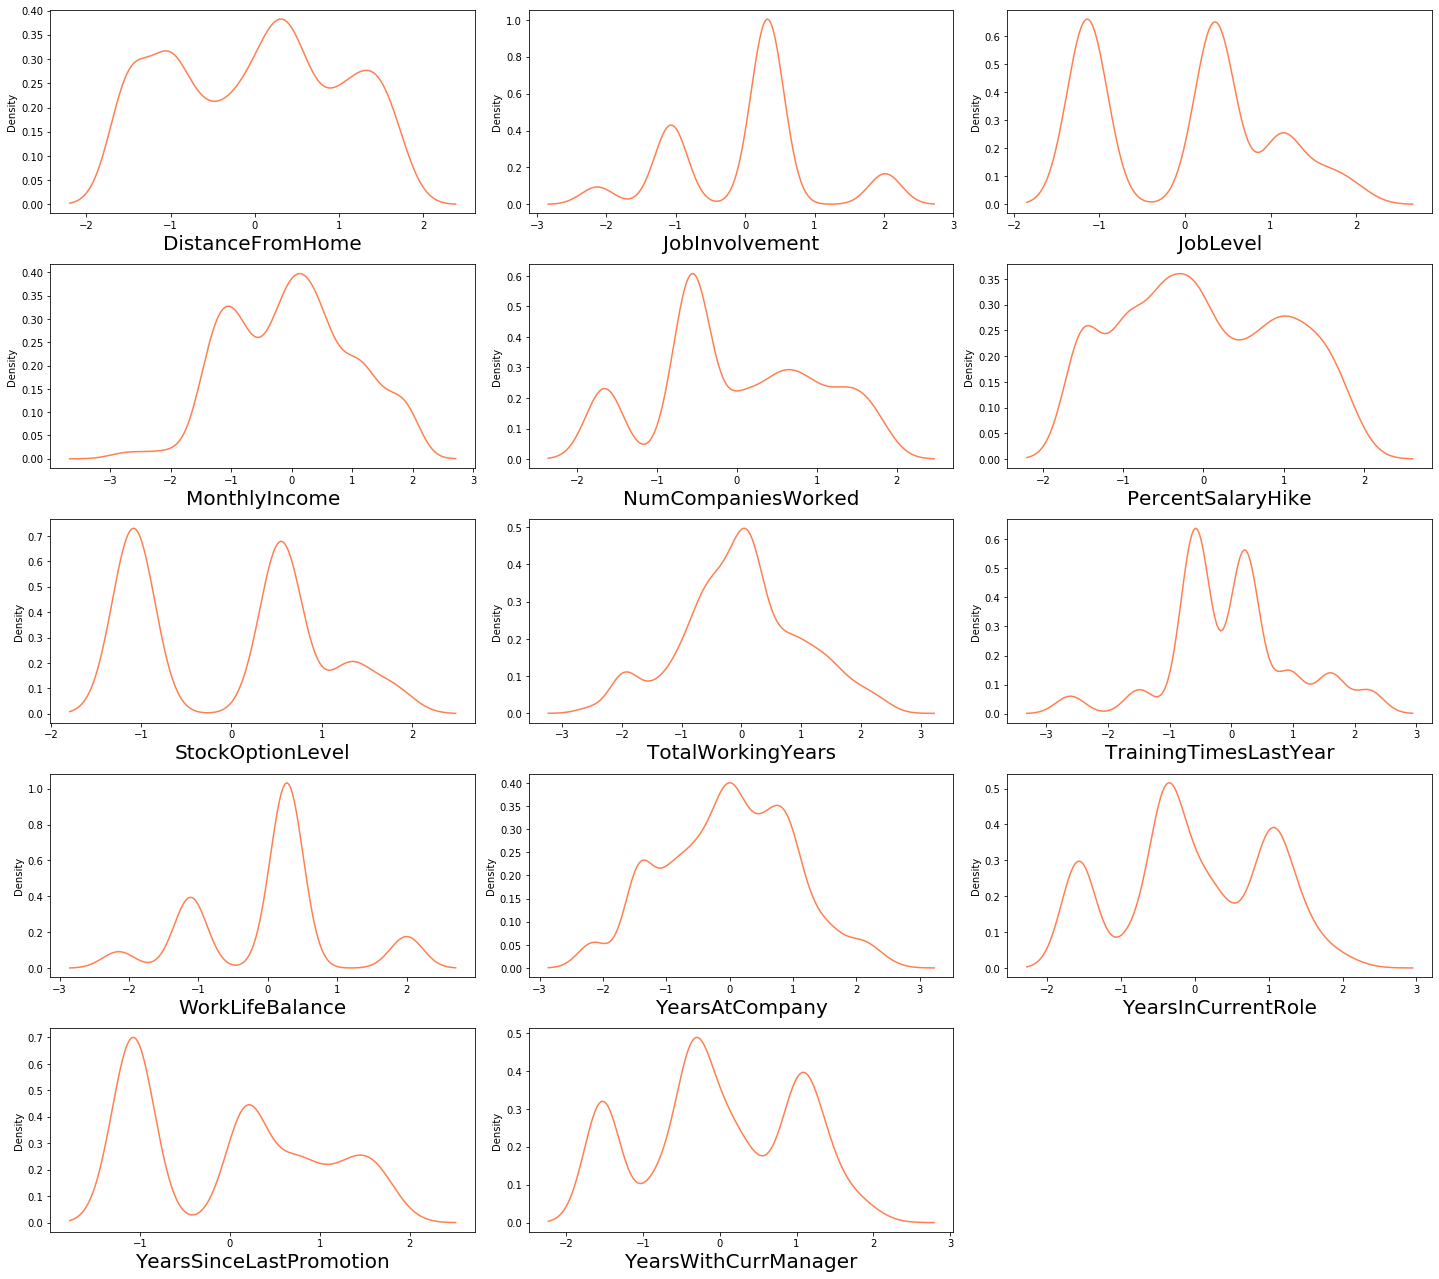

In [391]:
#Viewing the distribution plot after skewness removal
plt.figure(figsize=(20,35))
plotnumber=1

for column in df_new[skewed]:
    if plotnumber<=24:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df_new[column],color='coral',hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

In [392]:
df_new.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

# Label Encoder

In [394]:
# Let's convert the categorical data to numerical data

categorical_data=['Attrition','BusinessTravel','Department','DistanceFromHome','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [395]:
le=LabelEncoder()

df_new[categorical_data]=df_new[categorical_data].apply(le.fit_transform)

In [396]:
df_new[categorical_data]

Attrition  BusinessTravel  Department  DistanceFromHome  EducationField  \
0             1               2           2                 0               1   
1             0               1           1                 7               1   
2             1               2           1                 1               4   
3             0               1           1                 2               1   
4             0               2           1                 1               3   
...         ...             ...         ...               ...             ...   
1465          0               1           1                22               3   
1466          0               2           1                 5               3   
1467          0               2           1                 3               1   
1468          0               1           2                 1               3   
1469          0               2           1                 7               3   

      Gender  JobRole  MaritalStatus  OverTime  
0          0        7              2         1  
1          1        6              1         0  
2          1        2              2         1  
3          0        6              1         1  
4          1        2              1         0  
...      ...      ...            ...       ...  
1465       1        2              1         0  
1466       1        0              1         0  
1467       1        4              1         1  
1468       1        7              1         0  
1469       1        2              1         0  

[1387 rows x 9 columns]

In [397]:
df_new=df_new.drop("Over18",axis=1)

In [398]:
df_new.dtypes

Age                           int64
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
OverTime                      int32
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            float64
TotalWorkingYears           

In [400]:
df_new.head(2)


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 0   
1   49          0               1        279           1                 7   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80         -1.084263   
1                         4             80          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524         -2.14795        0.231837   
1           0.147620               0.217074          0.27486        0.948319   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  

[2 rows x 34 columns]

In [401]:
df_new.shape

(1387, 34)

In [402]:
# Let's remove the column Hourly Rate and BusinessTravel

df_new=df_new.drop(columns=['HourlyRate','BusinessTravel'])

In [403]:
df_new.shape

(1387, 32)

In [422]:
# Splitting the feature and independent variable into x and y variable

x=df_new.drop('Attrition',axis=1)
x

Age  DailyRate  Department  DistanceFromHome  Education  EducationField  \
0      41       1102           2                 0          2               1   
1      49        279           1                 7          1               1   
2      37       1373           1                 1          2               4   
3      33       1392           1                 2          4               1   
4      27        591           1                 1          1               3   
...   ...        ...         ...               ...        ...             ...   
1465   36        884           1                22          2               3   
1466   39        613           1                 5          1               3   
1467   27        155           1                 3          3               1   
1468   49       1023           2                 1          3               3   
1469   34        628           1                 7          3               3   

      EmployeeNumber  EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
0                  1                        2       0        0.322170  ...   
1                  2                        3       1       -1.065841  ...   
2                  4                        4       1       -1.065841  ...   
3                  5                        4       0        0.322170  ...   
4                  7                        1       1        0.322170  ...   
...              ...                      ...     ...             ...  ...   
1465            2061                        3       1        2.016459  ...   
1466            2062                        4       1       -1.065841  ...   
1467            2064                        2       1        2.016459  ...   
1468            2065                        4       1       -1.065841  ...   
1469            2068                        2       1        2.016459  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1         -1.084263   
1                     4                         4          0.548653   
2                     3                         2         -1.084263   
3                     3                         3         -1.084263   
4                     3                         4          0.548653   
...                 ...                       ...               ...   
1465                  3                         3          0.548653   
1466                  3                         1          0.548653   
1467                  4                         2          0.548653   
1468                  3                         4         -1.084263   
1469                  3                         1         -1.084263   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0             -0.173231              -2.608524        -2.147950   
1              0.147620               0.217074         0.274860   
2             -0.351153               0.217074         0.274860   
3             -0.173231               0.217074         0.274860   
4             -0.544046               0.217074         0.274860   
...                 ...                    ...              ...   
1465           1.039364               0.217074         0.274860   
1466          -0.007630               1.606919         0.274860   
1467          -0.544046              -2.608524         0.274860   
1468           1.039364               0.217074        -1.112829   
1469          -0.544046               0.217074         2.001970   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0           0.231837            0.290524                -1.073534   
1           0.948319            1.006575                 0.193168   
2          -2.156089           -1.571814                -1.073534   
3           0.621429            1.006575                 1.027520   
4          -0.933983           -0.390769                 0.722874   
...              ...    

In [423]:
y=df_new['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

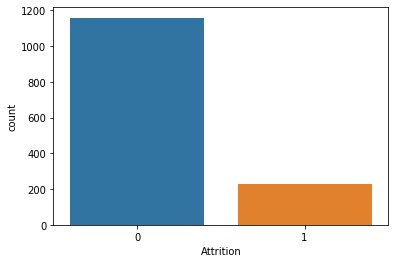

In [424]:
sns.countplot(y)

Attrition count is imbalance, let's use SMOTE Imbalance technique to balance the Attrition.

# Oversampling the Attrition

# SMOTE

In [425]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [426]:
y.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

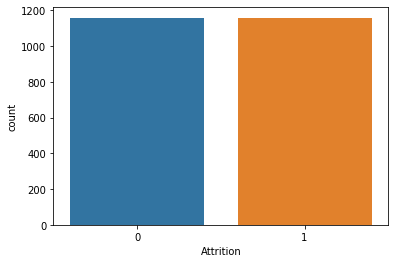

In [427]:
sns.countplot(y)

# Scaling the data

In [428]:
scaled=StandardScaler()
scaled.fit(x)

StandardScaler()

In [429]:
x_scaled=scaled.fit_transform(x)
print(x_scaled)

[[ 0.72820837  0.83789928  1.60962967 ...  0.4909591  -1.11781111
   0.79314442]
 [ 1.66173391 -1.31957356 -0.34624772 ...  1.24225593  0.24153497
   1.24508408]
 [ 0.2614456   1.54831864 -0.34624772 ... -1.46304805 -1.11781111
  -1.39513874]
 ...
 [ 0.2614456   0.78022686 -0.34624772 ... -1.37653928 -0.75562034
  -1.08578001]
 [ 1.07828045  0.48137886 -0.34624772 ... -0.91219796  0.14664536
  -0.22148493]
 [ 0.37813629  1.36219401 -0.34624772 ... -0.31890798 -1.11781111
   0.08588564]]


# Variance Inflation Factor

In [430]:
# Checking the Variance Inflation Factor

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

Features       VIF
0                        Age  1.937772
1                  DailyRate  1.041337
2                 Department  1.984150
3           DistanceFromHome  1.031924
4                  Education  1.072652
5             EducationField  1.052644
6             EmployeeNumber  1.043510
7    EnvironmentSatisfaction  1.068256
8                     Gender  1.057810
9             JobInvolvement  1.045877
10                  JobLevel  5.667745
11                   JobRole  1.825410
12           JobSatisfaction  1.087840
13             MaritalStatus  2.019851
14             MonthlyIncome  5.737997
15               MonthlyRate  1.056109
16        NumCompaniesWorked  1.448357
17                  OverTime  1.042810
18         PercentSalaryHike  1.496093
19         PerformanceRating  1.492101
20  RelationshipSatisfaction  1.068586
21          StockOptionLevel  2.072336
22         TotalWorkingYears  4.550848
23     TrainingTimesLastYear  1.028414
24           WorkLifeBalance  1.022829
25            YearsAtCompany  7.130145
26        YearsInCurrentRole  4.130509
27   YearsSinceLastPromotion  1.487706
28      YearsWithCurrManager  3.762678

There is no multicollinearity exist in data, we are good to proceed further

# Principle Component Analysis

In [598]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(x_scaled)

PCA()

In [600]:
pca.fit_transform(x_scaled)

array([[ 0.94336023, -0.22834634, -2.68920003, ..., -0.84180838,
         0.19638558,  0.08443145],
       [ 2.16363246, -0.44320164,  0.21333571, ..., -0.6124469 ,
         0.11602869, -0.07777055],
       [-2.90743001,  0.96533593, -0.79895451, ...,  0.2521359 ,
        -0.10415815, -0.44861672],
       ...,
       [-1.02005363,  2.53139091, -0.82225615, ...,  0.63034656,
         0.11968699, -0.11589677],
       [ 0.01579306,  0.64538863, -1.24182268, ..., -0.07303009,
         0.20405268, -0.02631705],
       [-1.45460745,  0.73329805,  0.96893353, ...,  0.21943902,
         0.05480091, -0.19072035]])

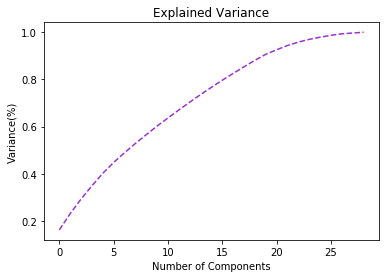

In [606]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='darkorchid',linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Explained Variance")
plt.show()

# Splitting the data into training and testing

In [452]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,random_state=195,test_size=30)

In [453]:
train_x.shape

(2286, 29)

In [454]:
test_x.shape

(30, 29)

In [455]:
train_y.shape

(2286,)

In [456]:
test_y.shape

(30,)

# Model Building

# Logistic Regression

In [457]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [458]:
lg_pred=lg.predict(test_x)
print("Predicted Value:",lg_pred)

Predicted Value: [1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0]


In [459]:
lg.coef_

array([[-0.15006033, -0.17062697, -0.24797391,  0.22672464, -0.32249953,
        -0.08807883, -0.01560795, -0.66851046, -0.13306346, -0.38007041,
         0.20856793,  0.12508387, -0.62290054, -0.3756769 , -0.37614834,
         0.00878648,  0.54723701,  0.53474415,  0.03431368, -0.34914517,
        -0.4618885 , -0.80104179, -0.75691947, -0.13193641, -0.1684763 ,
         0.35054936, -0.25880222,  0.44958523, -0.36003285]])

In [460]:
lg.intercept_

array([-0.0336047])

In [461]:
print("The Training Score:",lg.score(train_x,train_y))

The Training Score: 0.8040244969378828


In [462]:
print("The Testing Score:",lg.score(test_x,test_y))

The Testing Score: 0.8666666666666667


In [463]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("R2 Score is:",r2_score(test_y,lg_pred))
print("Mean Absolute Error:",mean_absolute_error(test_y,lg_pred))
print("Mean Squared Error:",mean_squared_error(test_y,lg_pred))

R2 Score is: 0.44444444444444464
Mean Absolute Error: 0.13333333333333333
Mean Squared Error: 0.13333333333333333


In [541]:
print("Accuracy Score:",accuracy_score(test_y,lg_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,lg_pred))
print("Classification Report:\n",classification_report(test_y,lg_pred))

Accuracy Score: 0.8666666666666667
Confusion Matrix:
 [[14  4]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.75      1.00      0.86        12

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.87        30
weighted avg       0.90      0.87      0.87        30



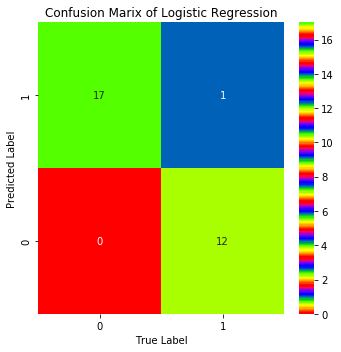

In [542]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,dtc_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="prism",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of Logistic Regression")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# DecisionTreeClassifier

In [464]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [465]:
dtc_pred=dtc.predict(test_x)
print("Predicted value:",dtc_pred)

Predicted value: [1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0]


In [466]:
print("Accuracy Score:",accuracy_score(test_y,dtc_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,dtc_pred))
print("Classification Report:\n",classification_report(test_y,dtc_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[17  1]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



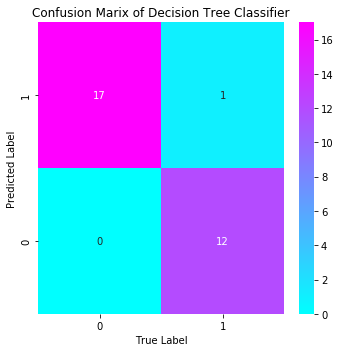

In [536]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,dtc_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="cool",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of Decision Tree Classifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# KNeighborsClassifier

In [475]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=2)

In [476]:
knn_pred=knn.predict(test_x)
knn_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0])

In [478]:
print("Accuracy Score:",accuracy_score(test_y,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,knn_pred))
print("Classification Report:\n",classification_report(test_y,knn_pred))

Accuracy Score: 0.9333333333333333
Confusion Matrix:
 [[16  2]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



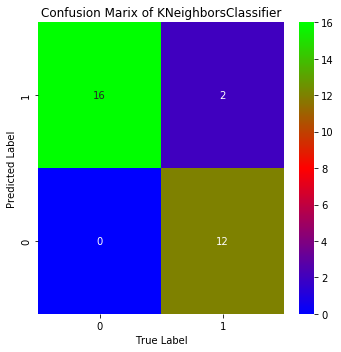

In [534]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,knn_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="brg",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of KNeighborsClassifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# Support Vector Classifier

In [480]:
svc=SVC()
svc.fit(train_x,train_y)

SVC()

In [481]:
svc_pred=svc.predict(test_x)
print(svc_pred)

[1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0]


In [482]:
print("Accuracy Score:",accuracy_score(test_y,svc_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,svc_pred))
print("Classification Report:\n",classification_report(test_y,svc_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[17  1]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



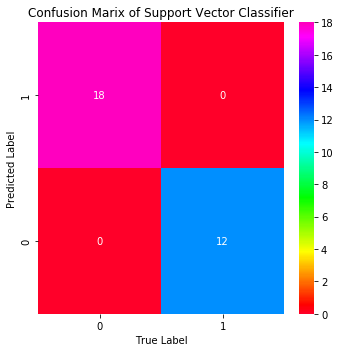

In [532]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,rfc_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="gist_rainbow",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of Support Vector Classifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [505]:
rfc=RandomForestClassifier(n_estimators=70,random_state=50)
rfc.fit(train_x,train_y)

RandomForestClassifier(n_estimators=70, random_state=50)

In [506]:
rfc_pred=rfc.predict(test_x)
print("Predicted Value:",rfc_pred)

Predicted Value: [1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0]


In [507]:
print("Accuracy Score:",accuracy_score(test_y,rfc_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,rfc_pred))
print("Classification Report:\n",classification_report(test_y,rfc_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[18  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



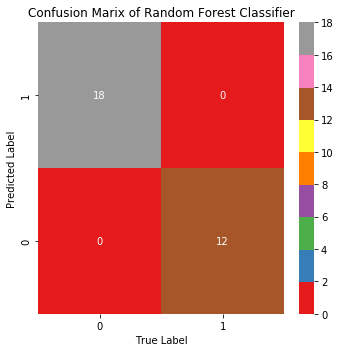

In [531]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,rfc_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="Set1",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of Random Forest Classifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# AdaBoost Classifier

In [508]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(train_x,train_y)

AdaBoostClassifier()

In [510]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n",ada_pred)

Predicted value:
 [1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0]


In [511]:
print("Accuracy Score:",accuracy_score(test_y,ada_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,ada_pred))
print("Classification Report:\n",classification_report(test_y,ada_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[18  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



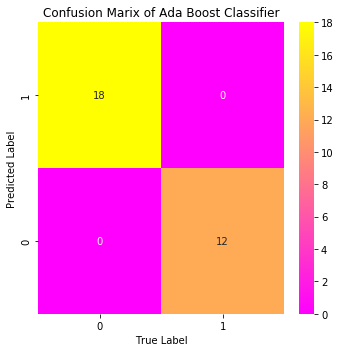

In [540]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,ada_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="spring",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of Ada Boost Classifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# Gradient Boosting Classifier

In [512]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(train_x,train_y)

GradientBoostingClassifier()

In [513]:
gbc_pred=gbc.predict(test_x)
print("Predicted value:\n",gbc_pred)

Predicted value:
 [1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0]


In [514]:
print("Accuracy Score:",accuracy_score(test_y,gbc_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,gbc_pred))
print("Classification Report:\n",classification_report(test_y,gbc_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[18  0]
 [ 1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



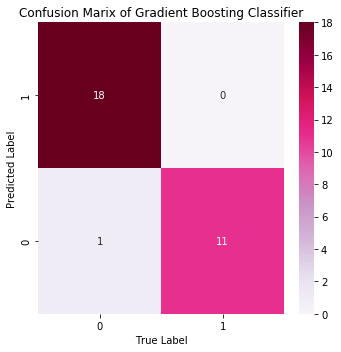

In [526]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,gbc_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="PuRd",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of Gradient Boosting Classifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

# XGBClassifier

In [516]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(train_x,train_y)

[23:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [517]:
xgb_pred=xgb.predict(test_x)
print("Predicted value:\n",xgb_pred)

Predicted value:
 [1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0]


In [518]:
print("Accuracy Score:",accuracy_score(test_y,xgb_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,xgb_pred))
print("Classification Report:\n",classification_report(test_y,xgb_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[18  0]
 [ 1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



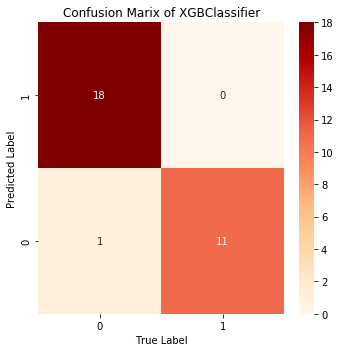

In [525]:
# Viewing the confusion matrix using heatmap
CM=confusion_matrix(test_y,xgb_pred)

x_axis=["0","1"]
y_axis=["1","0"]

figure,axes=plt.subplots(figsize=(5,5))

sns.heatmap(CM, annot=True, ax=axes, cmap="OrRd",linecolor='black',xticklabels=x_axis, yticklabels=y_axis)

plt.title("Confusion Marix of XGBClassifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

In [545]:
import warnings
warnings.filterwarnings('ignore')

In [550]:
for clf in (lg,dtc,rfc,knn,svc,ada,xgb,gbc):
    clf.fit(train_x,train_y)
    clf_pred=clf.predict(test_x)
    print(clf.__class__.__name__,accuracy_score(test_y,clf_pred))

LogisticRegression 0.8666666666666667
DecisionTreeClassifier 0.9666666666666667
RandomForestClassifier 1.0
KNeighborsClassifier 0.9333333333333333
SVC 0.9666666666666667
AdaBoostClassifier 1.0
[23:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9666666666666667
GradientBoostingClassifier 0.9666666666666667


# Cross Validation

In [554]:
# Cross Validation score for Logistic Regression
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for Logistic Regression")
print("***********************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for Logistic Regression
***********************************************
Cross Validation score is: 0.7201202590194263
Mean: 0.7201202590194263
Standard Deviation: 0.0


In [555]:
# Cross Validation score for Decision Tree Classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for Decision Tree Classifier")
print("***********************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for Decision Tree Classifier
***********************************************
Cross Validation score is: 0.8283071230342276
Mean: 0.8283071230342276
Standard Deviation: 0.0


In [556]:
# Cross Validation score for KNeighborsClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for KNeighbors Classifier")
print("***********************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for KNeighbors Classifier
***********************************************
Cross Validation score is: 0.7814246068455135
Mean: 0.7814246068455135
Standard Deviation: 0.0


In [557]:
# Cross Validation score for Support Vector Classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for Support Vector Classifier")
print("***********************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for Support Vector Classifier
***********************************************
Cross Validation score is: 0.5136262719703977
Mean: 0.5136262719703977
Standard Deviation: 0.0


In [558]:
# Cross Validation score for Ada Boost Classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for Ada Boost Classifier")
print("***********************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for Ada Boost Classifier
***********************************************
Cross Validation score is: 0.8918963922294172
Mean: 0.8918963922294172
Standard Deviation: 0.0


In [561]:
# Cross Validation score for Random Forest Classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for Random Forest Classifier")
print("*******************************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for Random Forest Classifier
*******************************************************
Cross Validation score is: 0.914440333024977
Mean: 0.914440333024977
Standard Deviation: 0.0


In [560]:
# Cross Validation score for Gradient Boosting Classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,x,y,cv=50,scoring='accuracy').mean()
print("Cross Validation score for Gradient Boosting Classifier")
print("*******************************************************")
print("Cross Validation score is:",score)
print("Mean:",score.mean())
print("Standard Deviation:",score.std())

Cross Validation score for Gradient Boosting Classifier
*******************************************************
Cross Validation score is: 0.9135522664199816
Mean: 0.9135522664199816
Standard Deviation: 0.0


Based on the Analysis of various model and Cross Validation. I choose Gradient Boost Classifier as my final model. Gradient Boosting Classifier accuracy is 96% and cross validation score is 91%. Which is a very good score.

# Hyper Parameter Tuning

In [562]:
parameters={
    "n_estimators":[5,50,150],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.001,0.1,1,10]}

In [564]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=gbc,param_grid=parameters,cv=5,verbose=3)

In [565]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=5;, score=0.688 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=5;, score=0.501 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=5;, score=0.501 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=5;, score=0.501 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=5;, score=0.501 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.688 total time=   0.2s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.689 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.683 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.685 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.716 to

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 150]},
             verbose=3)

In [567]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

# Final Model

In [568]:
final_model=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=150)
final_model.fit(train_x,train_y)

GradientBoostingClassifier(max_depth=7, n_estimators=150)

In [570]:
final_model_pred=final_model.predict(test_x)
print("Predicted Value:",final_model_pred)

Predicted Value: [1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0]


In [573]:
print("Accuracy Score:",accuracy_score(test_y,final_model_pred))
print("Confusion Matrix:\n",confusion_matrix(test_y,final_model_pred))
print("Classification Report:\n",classification_report(test_y,final_model_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[18  0]
 [ 1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Before tuning and after tuning the accracy score is same 96.66% for Gradient Boosting Classifier

# ROC AUC Curve

In [574]:
from sklearn.metrics import roc_auc_score,roc_curve

In [575]:
fpr,tpr,thresholds=roc_curve(test_y,final_model_pred)

In [576]:
fpr

array([0., 0., 1.])

In [577]:
tpr

array([0.        , 0.91666667, 1.        ])

In [578]:
thresholds

array([2, 1, 0])

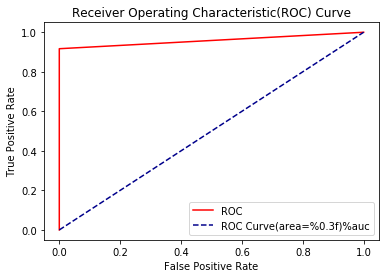

In [581]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)%auc')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

In [582]:
from sklearn.metrics import plot_roc_curve

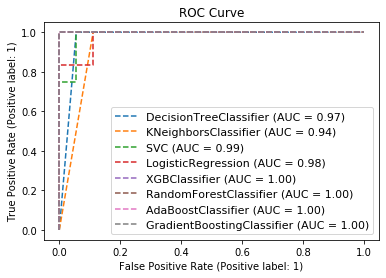

In [594]:
distp=plot_roc_curve(dtc,test_x,test_y,linestyle='--')
plot_roc_curve(knn,test_x,test_y,ax=distp.ax_,linestyle='--')
plot_roc_curve(svc,test_x,test_y,ax=distp.ax_,linestyle='--')
plot_roc_curve(lg,test_x,test_y,ax=distp.ax_,linestyle='--')
plot_roc_curve(xgb,test_x,test_y,ax=distp.ax_,linestyle='--')
plot_roc_curve(rfc,test_x,test_y,ax=distp.ax_,linestyle='--')
plot_roc_curve(ada,test_x,test_y,ax=distp.ax_,linestyle='--')
plot_roc_curve(gbc,test_x,test_y,ax=distp.ax_,linestyle='--')
plt.legend(prop={'size':11}, loc='lower right')
plt.title("ROC Curve")
plt.show()

# Saving the Model

In [607]:
import pickle

In [608]:
filename="HRAnalyticsPrediction.pickle"

In [609]:
pickle.dump(final_model,open(filename,'wb'))

In [610]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0])

In [611]:
loaded_model.score(train_x,train_y)

1.0

In [612]:
loaded_model.score(test_x,test_y)

0.9666666666666667

In [613]:
DF=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=["Predicted","Actual"])
DF

0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  \
Predicted   1   1   0   1   0   1   0   0   0   0  ...   0   1   0   1   1   
Actual      1   1   0   1   0   1   0   0   0   0  ...   0   1   1   1   1   

           25  26  27  28  29  
Predicted   1   0   0   1   0  
Actual      1   0   0   1   0  

[2 rows x 30 columns]

In [614]:
DF.to_csv("HRAnalyticPrediction.csv")

We got the predicted value from the best model. From this prediction we can improve the performance of the employees.